# Selbst generierte Künstliche fibers
## viertel Kreis

In [1]:
import numpy as np
import odf3 

In [53]:
Direction_zero = np.zeros((100,100,3))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,3))

In [3]:
np.pi

3.141592653589793

In [66]:
# direction füllen
Direction_zero = np.zeros((100,100,10))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,10))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if (i-50)**2+(j-50)**2  <= 45**2 and (i-50)**2+(j-50)**2 >= 40**2 and i <=50 and j <=50:
                Direction_zero[i,j,k] = np.arctan2(-i,j)+np.pi/2
            else:
                mask[i,j,k] = 0


In [67]:
band = 12
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], band)

In [68]:
odf3.coefficients_to_mrtrix_nii(f"6_deg_Test_100umgebung_{band}band", ODFs[:,:,:,:])

In [7]:
from main_lib import *

def test(result:np.ndarray, ODFs:np.ndarray, basis:np.ndarray, weights:np.ndarray)->np.ndarray:
    AODF_Amplitude = np.empty((result.shape[0]))
    for i, res in enumerate(result):
        # mask für nan werte
        nan_mask = ~np.isnan(res)
        mask = np.array(res[nan_mask], int)
        # shape anpassen
        mask_3d = np.reshape(mask, (3, int(mask.shape[0]/3)))
        # nur weights auswählen die nicht nan inhalte haben
        weight = weights[i, nan_mask[0]]
        Test_ODF_masked = np.multiply(weight, ODFs[mask_3d[0],mask_3d[1],mask_3d[2]-5].T).T
        current = np.multiply(basis[i], Test_ODF_masked)
        sum = np.sum(current)
        # if sum != 0.0:
        # print(sum,result.shape[0],res[0,~np.isnan(res[0])].shape[0])
        AODF_Amplitude[i] = sum/res[0,~np.isnan(res[0])].shape[0]
    return AODF_Amplitude

In [8]:
range_r, factor = 4, 100
dict_10_50 = generate_dict(range_r, factor) 

In [11]:

x_koord, y_koord, z_koord = 16,25,5
number_of_winkel = 10000

rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
costheta, sintheta = np.cos(theta), np.sin(theta)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)


basis = get_basis(phi, costheta, sintheta, band)

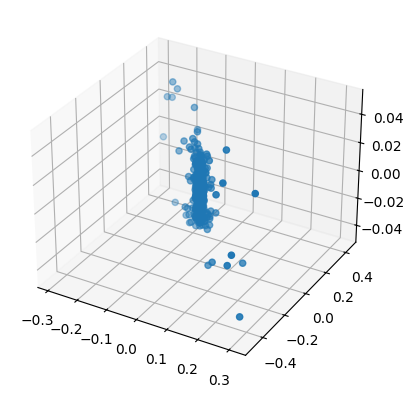

In [12]:
AODF_Amplitude = test(result, ODFs, basis, weights)

x = AODF_Amplitude[:,None] * np.cos(phi) * sintheta
y = AODF_Amplitude[:,None] * np.sin(phi) * sintheta
z = AODF_Amplitude[:,None] * costheta
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 1000
ax.scatter(x[:n],y[:n],z[:n])
plt.show()

Punkte gehen gewichtet in die ODFs ein

In [14]:
import odf

AODF_Dir = phi
AODF_Incl = theta


AODF = odf.compute(AODF_Dir,AODF_Incl, np.ones(AODF_Dir.shape))


In [46]:
import odf

AODF_Dir = phi
AODF_Incl = theta +np.pi/2


AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))

In [47]:
AODF.shape

(1, 1, 1, 91)

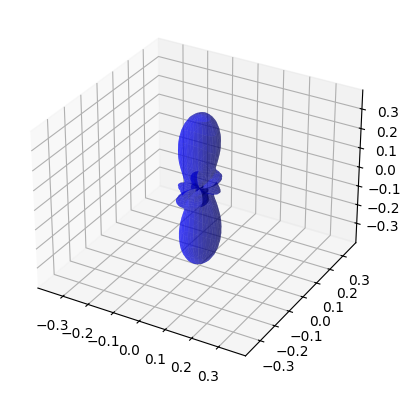

In [48]:
fig, ax = odf.visualize_odf(AODF[0,0,0], 64, 64)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

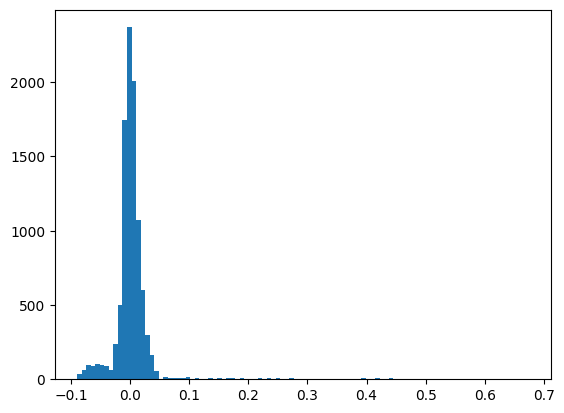

In [31]:
plt.hist(AODF_Amplitude, bins=100)
plt.show

In [52]:
AODF_mask = AODF_Amplitude > 0.05
AODF_mask.shape, phi.shape, np.sum(AODF_mask)

((10000,), (10000, 1), 309)

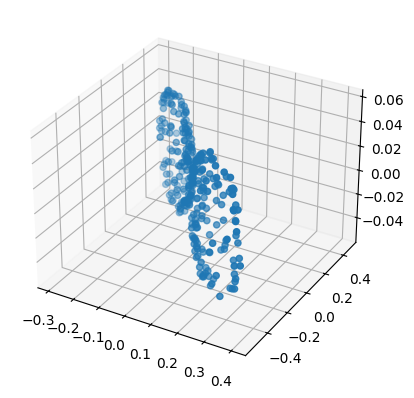

In [50]:
x = AODF_Amplitude[:,None] * np.cos(phi) * sintheta
y = AODF_Amplitude[:,None] * np.sin(phi) * sintheta
z = AODF_Amplitude[:,None] * costheta
x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])
plt.show()

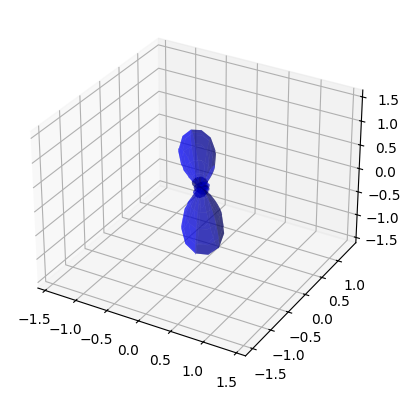

In [51]:
import odf

AODF_Dir = phi[AODF_mask,:]
AODF_Incl = theta[AODF_mask,:] + np.pi/2


AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
fig, ax = odf.visualize_odf(AODF[0,0,0], 64, 64)
plt.show()

# Kreuzung

In [54]:
import numpy as np
import odf3

In [93]:
# direction füllen
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if (i-50)**2+(j-50)**2  <= 45**2 and (i-50)**2+(j-50)**2 >= 40**2 and i <= 50 and j <= 50 and k >= 50:
                Direction_zero[i,j,k] = np.arctan2(-i,j)+np.pi/2
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0


In [94]:
band = 12
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], band)

In [96]:
odf3.coefficients_to_mrtrix_nii(f"crossing10_deg_Test_100umgebung_{band}band", ODFs[:,:,:,45:55])

In [97]:
from main_lib import *

def test(result:np.ndarray, ODFs:np.ndarray, basis:np.ndarray, weights:np.ndarray)->np.ndarray:
    AODF_Amplitude = np.empty((result.shape[0]))
    for i, res in enumerate(result):
        # mask für nan werte
        nan_mask = ~np.isnan(res)
        mask = np.array(res[nan_mask], int)
        # shape anpassen
        mask_3d = np.reshape(mask, (3, int(mask.shape[0]/3)))
        # nur weights auswählen die nicht nan inhalte haben
        weight = weights[i, nan_mask[0]]
        Test_ODF_masked = np.multiply(weight, ODFs[mask_3d[0],mask_3d[1],mask_3d[2]-5].T).T
        current = np.multiply(basis[i], Test_ODF_masked)
        sum = np.sum(current)
        # if sum != 0.0:
        # print(sum,result.shape[0],res[0,~np.isnan(res[0])].shape[0])
        AODF_Amplitude[i] = sum/res[0,~np.isnan(res[0])].shape[0]
    return AODF_Amplitude

In [76]:
range_r, factor = 4, 100
dict_10_50 = generate_dict(range_r, factor) 

In [84]:

x_koord, y_koord, z_koord = 20,20,5
number_of_winkel = 10000

rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
costheta, sintheta = np.cos(theta), np.sin(theta)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)


basis = get_basis(phi, costheta, sintheta, band)

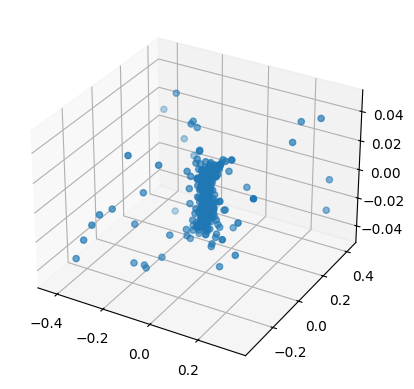

In [85]:
AODF_Amplitude = test(result, ODFs, basis, weights)

x = AODF_Amplitude[:,None] * np.cos(phi) * sintheta
y = AODF_Amplitude[:,None] * np.sin(phi) * sintheta
z = AODF_Amplitude[:,None] * costheta
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 1000
ax.scatter(x[:n],y[:n],z[:n])
plt.show()

Punkte gehen gewichtet in die ODFs ein

In [86]:
import odf

AODF_Dir = phi
AODF_Incl = theta +np.pi/2


AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))

In [87]:
AODF.shape

(1, 1, 1, 91)

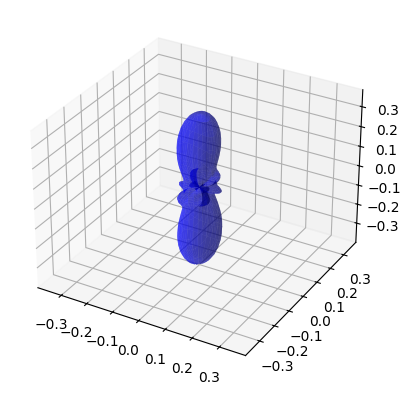

In [88]:
fig, ax = odf.visualize_odf(AODF[0,0,0], 64, 64)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

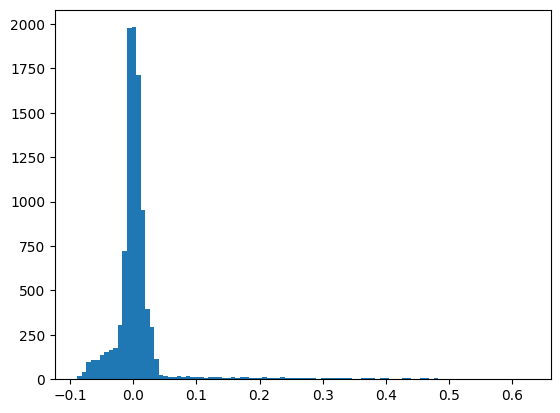

In [89]:
plt.hist(AODF_Amplitude, bins=100)
plt.show

In [90]:
AODF_mask = AODF_Amplitude > 0.05
AODF_mask.shape, phi.shape, np.sum(AODF_mask)

((10000,), (10000, 1), 513)

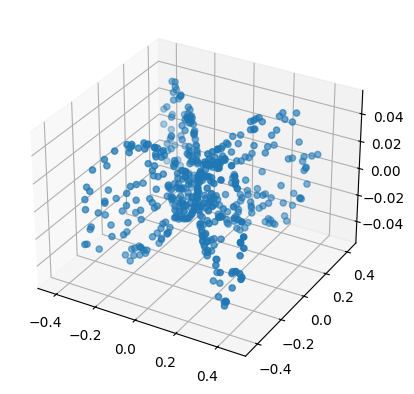

In [91]:
x = AODF_Amplitude[:,None] * np.cos(phi) * sintheta
y = AODF_Amplitude[:,None] * np.sin(phi) * sintheta
z = AODF_Amplitude[:,None] * costheta
x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])
plt.show()

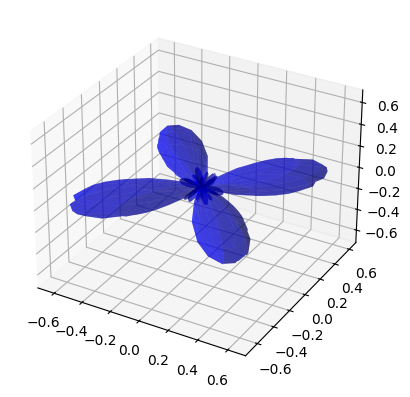

In [132]:
import odf

AODF_Dir = phi[AODF_mask,:]
AODF_Incl = theta[AODF_mask,:] + np.pi/2


AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
fig, ax = odf.visualize_odf(AODF[0,0,0], 64, 64)
plt.show()

# Y-Phaser

## Älter

In [2]:
import numpy as np
import odf3

In [150]:
# direction füllen
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

band = 12
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], band)
ODFs.shape

odf3.coefficients_to_mrtrix_nii(f"0Ycrossing_deg_Test_100umgebung_{band}band", ODFs[:,:,45:55,:])

In [1]:
from main_lib import *

def test(result:np.ndarray, ODFs:np.ndarray, basis:np.ndarray, weights:np.ndarray)->np.ndarray:
    AODF_Amplitude = np.empty((result.shape[0]))
    for i, res in enumerate(result):
        # mask für nan werte
        nan_mask = ~np.isnan(res)
        mask = np.array(res[nan_mask], int)
        # shape anpassen
        mask_3d = np.reshape(mask, (3, int(mask.shape[0]/3)))
        # nur weights auswählen die nicht nan inhalte haben
        weight = weights[i, nan_mask[0]]
        Test_ODF_masked = np.multiply(weight, ODFs[mask_3d[0],mask_3d[1],mask_3d[2]-5].T).T
        current = np.multiply(basis[i], Test_ODF_masked)
        sum = np.sum(current)
        # if sum != 0.0:
        # print(sum,result.shape[0],res[0,~np.isnan(res[0])].shape[0])
        AODF_Amplitude[i] = sum/res[0,~np.isnan(res[0])].shape[0]
    return AODF_Amplitude
    

In [152]:
range_r, factor = 7, 100
dict_10_50 = generate_dict(range_r, factor) 

In [153]:
x_koord, y_koord, z_koord = 25,25,5
number_of_winkel = 10000

rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
costheta, sintheta = np.cos(theta), np.sin(theta)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)


basis = get_basis(phi, costheta, sintheta, band)

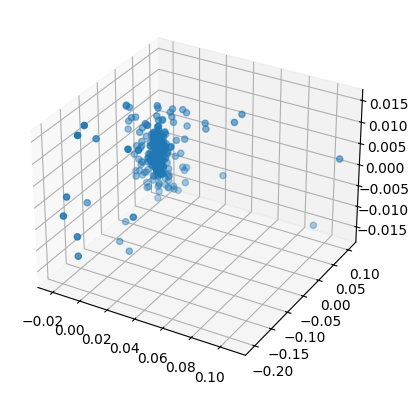

In [154]:
AODF_Amplitude = test(result, ODFs, basis, weights)

x = AODF_Amplitude[:,None] * np.cos(phi) * sintheta
y = AODF_Amplitude[:,None] * np.sin(phi) * sintheta
z = AODF_Amplitude[:,None] * costheta
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 1000
ax.scatter(x[:n],y[:n],z[:n])
plt.show()

Punkte gehen gewichtet in die ODFs ein

In [155]:
import odf

AODF_Dir = phi
AODF_Incl = theta +np.pi/2


AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))

In [156]:
AODF.shape

(1, 1, 1, 91)

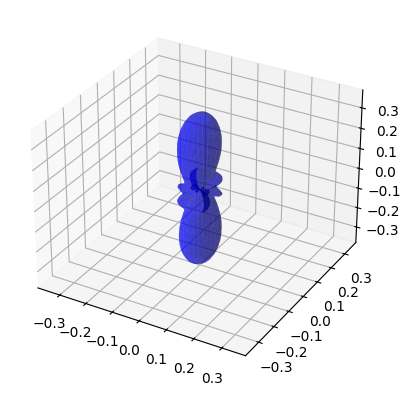

In [157]:
fig, ax = odf.visualize_odf(AODF[0,0,0], 64, 64)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

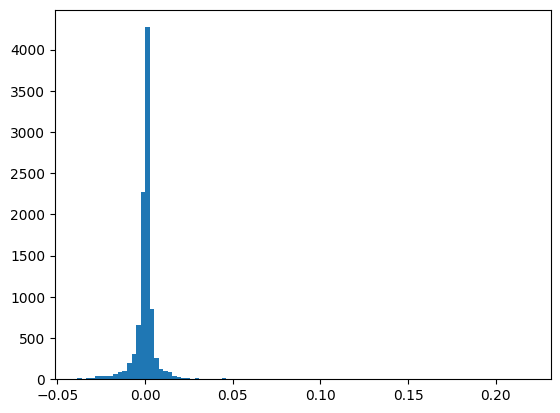

In [158]:
plt.hist(AODF_Amplitude, bins=100)
plt.show

In [159]:
AODF_mask = AODF_Amplitude > 0.025
AODF_mask.shape, phi.shape, np.sum(AODF_mask)

((10000,), (10000, 1), 220)

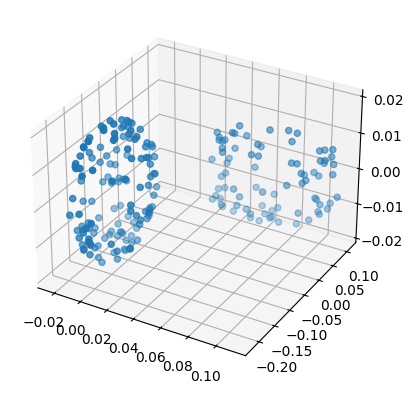

In [160]:
x = AODF_Amplitude[:,None] * np.cos(phi) * sintheta
y = AODF_Amplitude[:,None] * np.sin(phi) * sintheta
z = AODF_Amplitude[:,None] * costheta
x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])
plt.show()

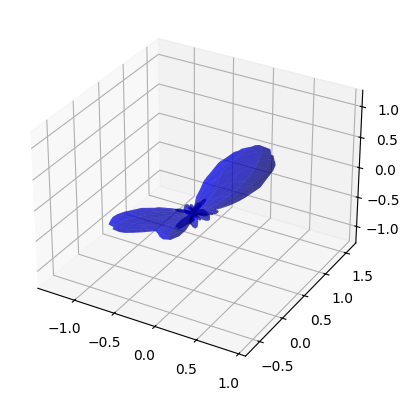

In [161]:
import odf

AODF_Dir = phi[AODF_mask,:]
AODF_Incl = theta[AODF_mask,:] + np.pi/2


AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
fig, ax = odf.visualize_odf(AODF[0,0,0], 64, 64)
plt.show()

In [162]:
AODF.shape

(1, 1, 1, 91)

In [166]:
AODFs_raw = np.empty((50,50,100,91))

In [3]:
k_ = 50
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 10000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
        costheta, sintheta = np.cos(theta), np.sin(theta)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Richtungsvektoren generieren
        basis = get_basis(phi, costheta, sintheta, band)
        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = test(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]
        

NameError: name 'dict_10_50' is not defined

In [169]:
odf3.coefficients_to_mrtrix_nii(f"AODFYcrossing_deg_Test_100umgebung_{band}band", AODFs_raw[:,:,45:55,:])

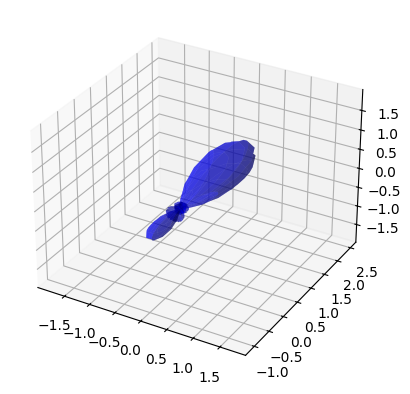

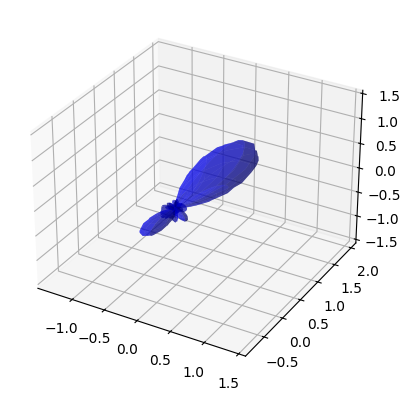

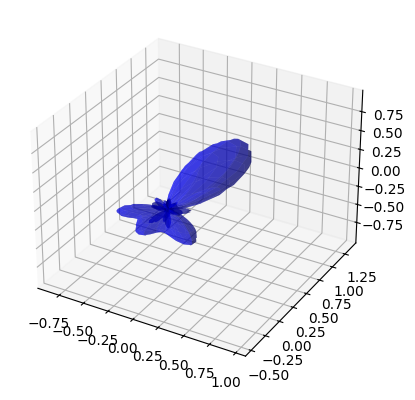

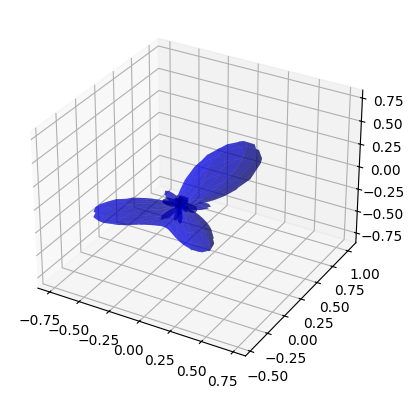

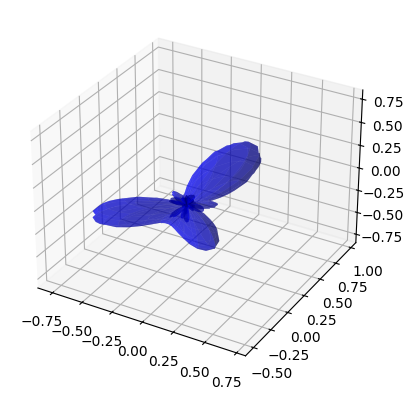

In [170]:
for i in range(23,28):
    fig, ax = odf.visualize_odf(AODFs_raw[i,26,50], 64, 64)


## Ohne die + pi/2

In [171]:
k_ = 50
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 10000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
        costheta, sintheta = np.cos(theta), np.sin(theta)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Richtungsvektoren generieren
        basis = get_basis(phi, costheta, sintheta, band)
        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = test(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] # + np.pi/2 ------------------------------------------------
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]
        

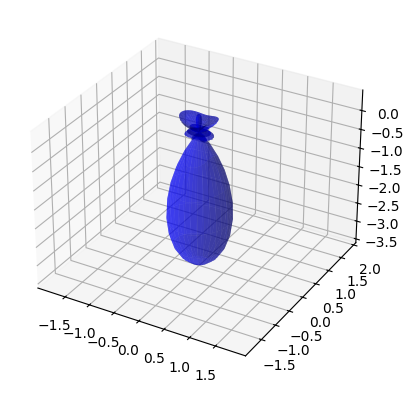

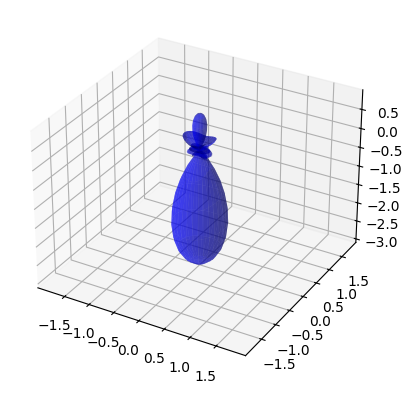

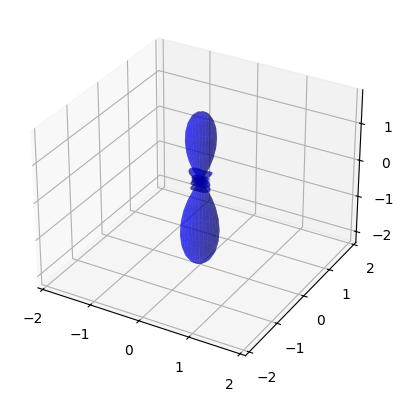

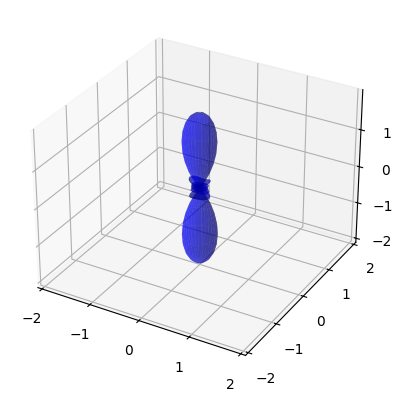

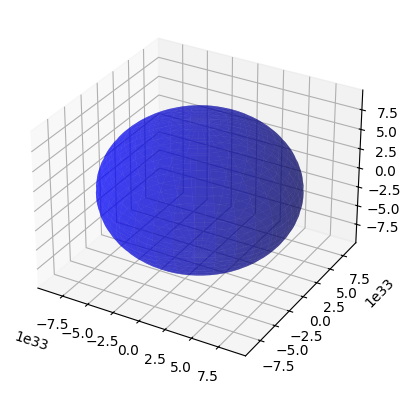

In [172]:
for i in range(23,28):
    fig, ax = odf.visualize_odf(AODFs_raw[i,26,50], 64, 64)


## War notwendig

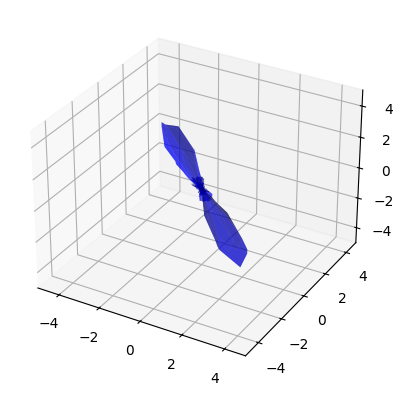

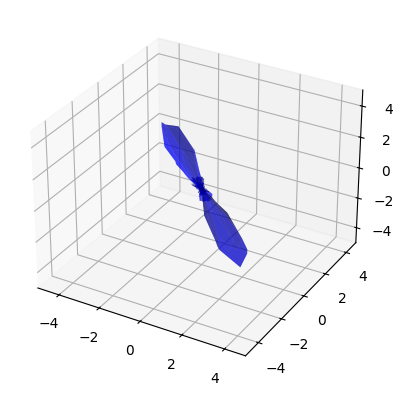

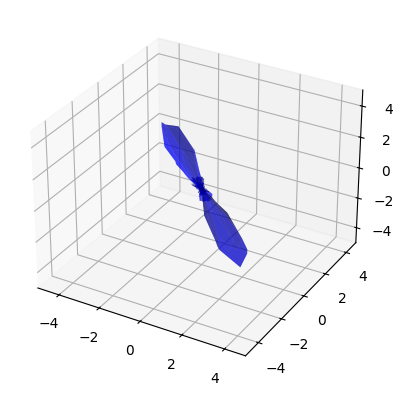

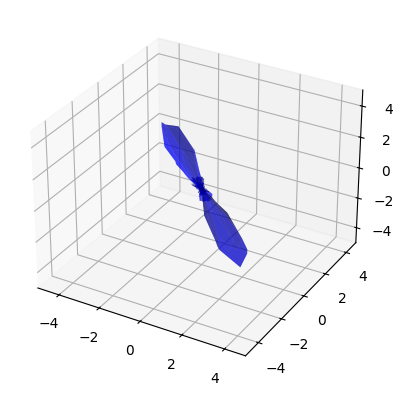

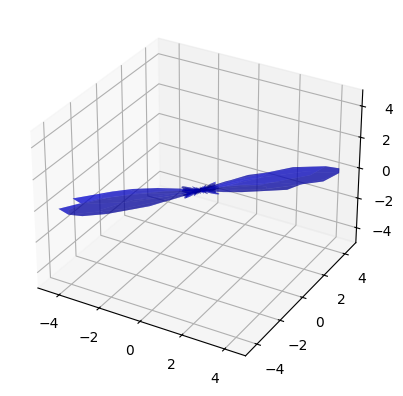

In [173]:
for i in range(23,28):
    fig, ax = odf3.visualize_odf(ODFs[i,26,50], 64, 64)


# Y-Phaser Neuer

In [9]:
from main_lib import *
import numpy as np
import odf3
import odf

def test(result:np.ndarray, ODFs:np.ndarray, basis:np.ndarray, weights:np.ndarray)->np.ndarray:
    AODF_Amplitude = np.empty((result.shape[0]))
    for i, res in enumerate(result):
        # mask für nan werte
        nan_mask = ~np.isnan(res)
        mask = np.array(res[nan_mask], int)
        # shape anpassen
        mask_3d = np.reshape(mask, (3, int(mask.shape[0]/3)))
        # nur weights auswählen die nicht nan inhalte haben
        weight = weights[i, nan_mask[0]]
        Test_ODF_masked = np.multiply(weight, ODFs[mask_3d[0],mask_3d[1],mask_3d[2]-5].T).T
        current = np.multiply(basis[i], Test_ODF_masked)
        sum = np.sum(current)
        # if sum != 0.0:
        # print(sum,result.shape[0],res[0,~np.isnan(res[0])].shape[0])
        AODF_Amplitude[i] = sum/res[0,~np.isnan(res[0])].shape[0]
    return AODF_Amplitude

range_r, factor = 6, 100
dict_10_50 = generate_dict(range_r, factor) 

In [14]:
# direction füllen
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

band = 10
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], band)
ODFs.shape

(100, 100, 100, 66)

In [17]:
odf3.coefficients_to_mrtrix_nii(f"0SicherheitYcrossing_deg_Test_100umgebung_{band}band", ODFs[:,:,45:55,:])

## number_of_winkel = 10000


In [15]:
k_ = 50
AODFs_raw = np.empty((50,50,100,91))
band = 10
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 10000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
        costheta, sintheta = np.cos(theta), np.sin(theta)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Richtungsvektoren generieren
        basis = get_basis(phi, costheta, sintheta, band)
        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = test(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]
        

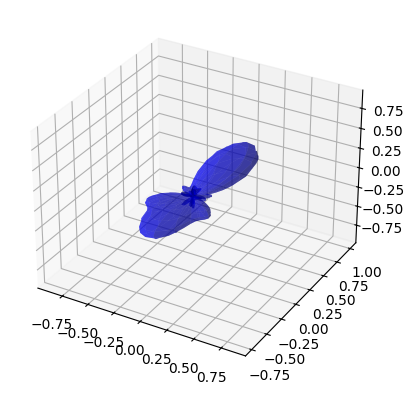

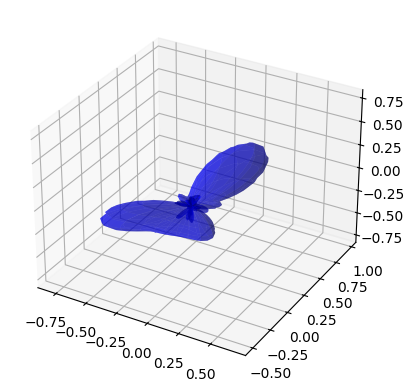

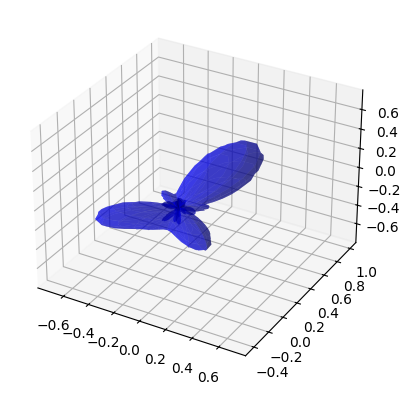

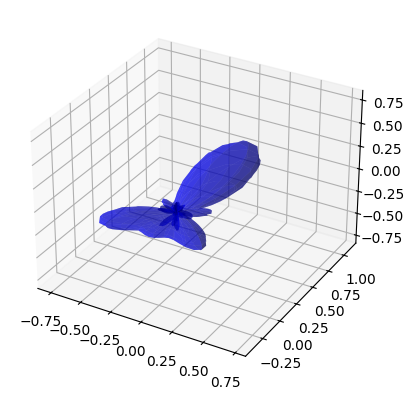

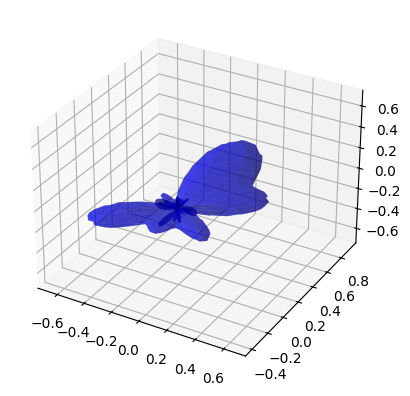

In [21]:
for i in range(23,28):
    fig, ax = odf.visualize_odf(AODFs_raw[25,i,50], 64, 64)


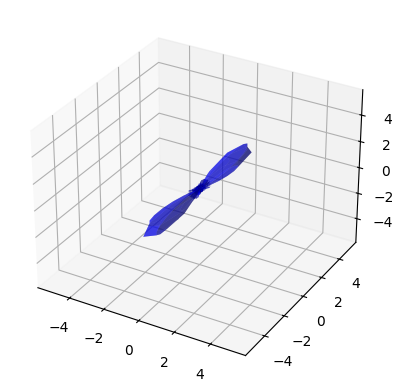

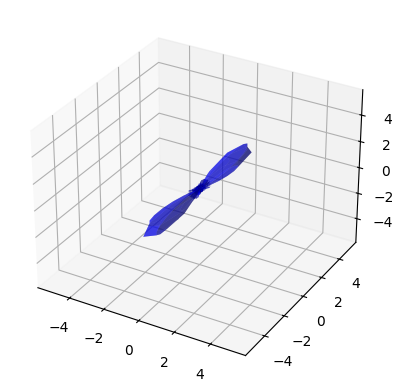

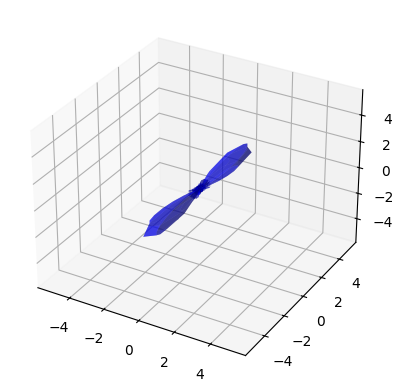

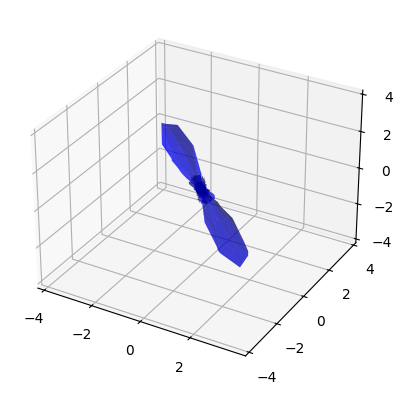

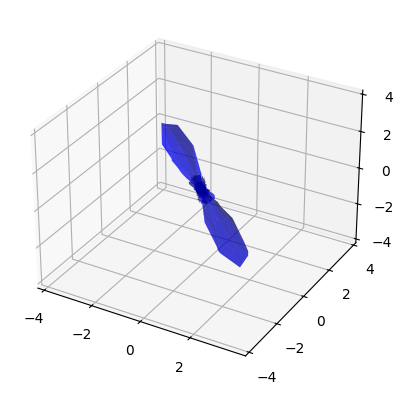

In [19]:
for i in range(23,28):
    fig, ax = odf3.visualize_odf(ODFs[25,i,50], 64, 64)

## number_of_winkel = 1000


In [22]:
k_ = 50
AODFs_raw = np.empty((50,50,100,91))
band = 10
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 1000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
        costheta, sintheta = np.cos(theta), np.sin(theta)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Richtungsvektoren generieren
        basis = get_basis(phi, costheta, sintheta, band)
        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = test(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]
        

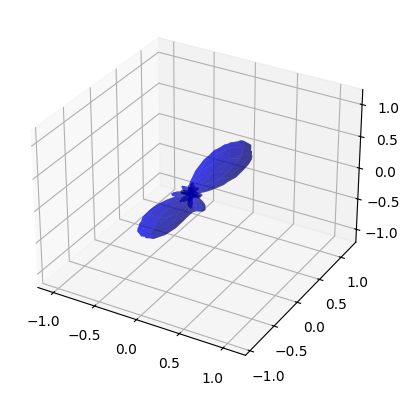

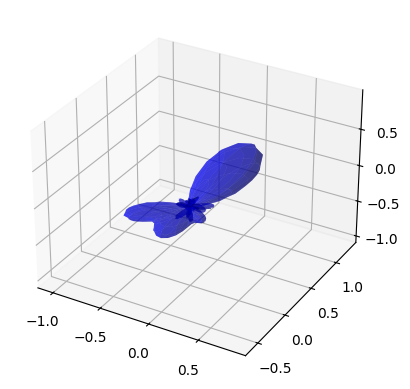

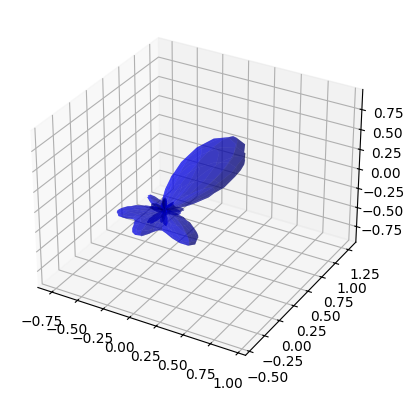

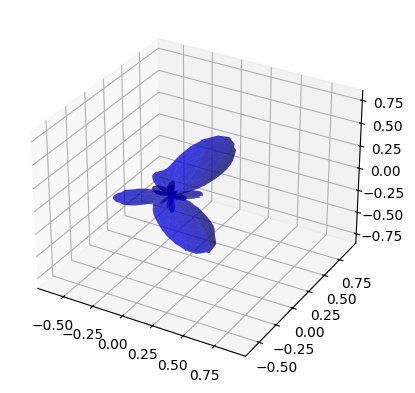

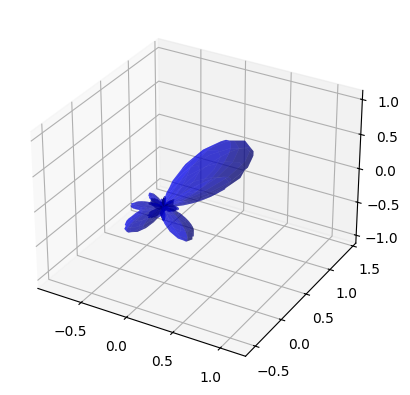

In [23]:
for i in range(23,28):
    fig, ax = odf.visualize_odf(AODFs_raw[25,i,50], 64, 64)


## number_of_winkel = 100000


In [24]:
k_ = 50
AODFs_raw = np.empty((50,50,100,91))
band = 10
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 100000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
        costheta, sintheta = np.cos(theta), np.sin(theta)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Richtungsvektoren generieren
        basis = get_basis(phi, costheta, sintheta, band)
        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = test(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]
        

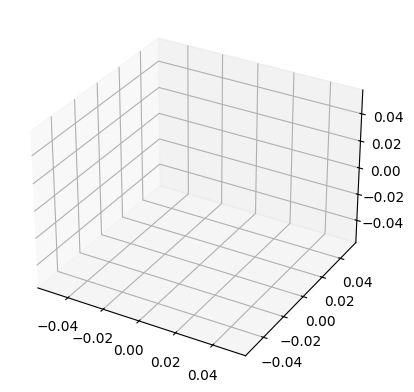

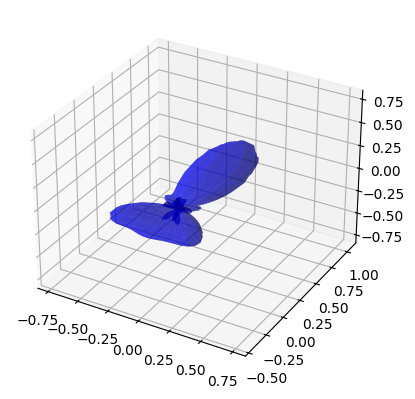

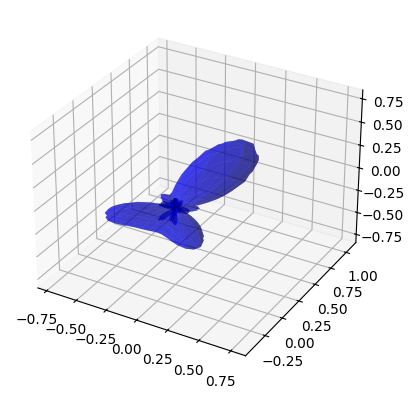

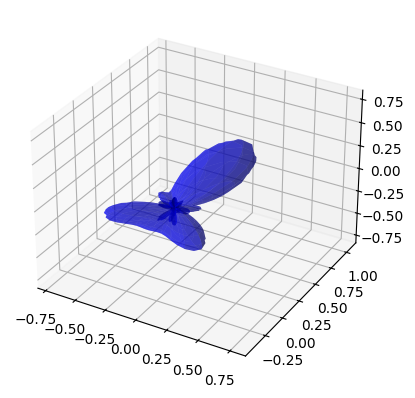

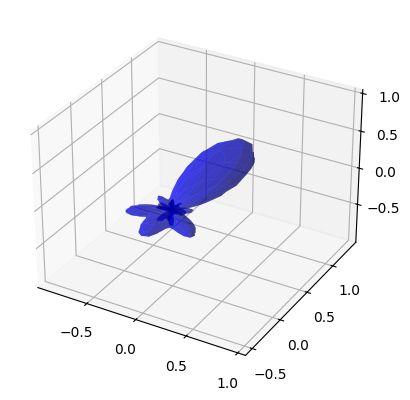

In [26]:
for i in range(23,28):
    fig, ax = odf.visualize_odf(AODFs_raw[25,i,50], 64, 64)


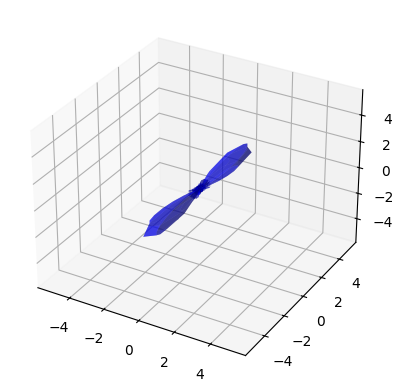

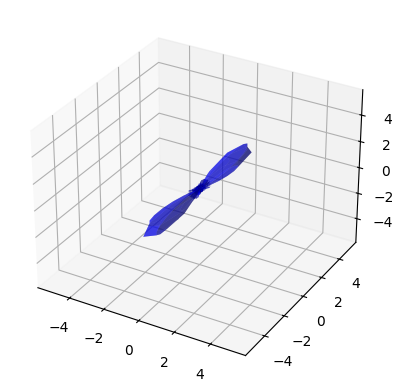

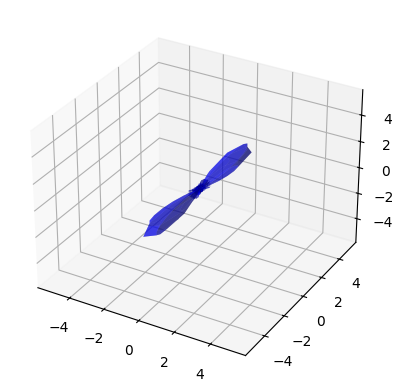

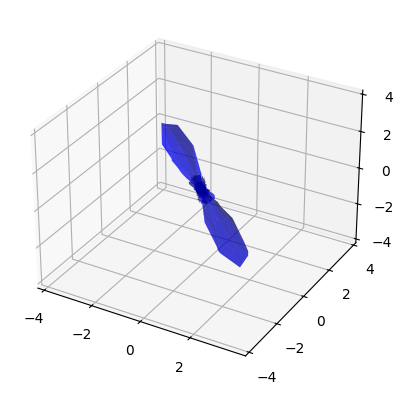

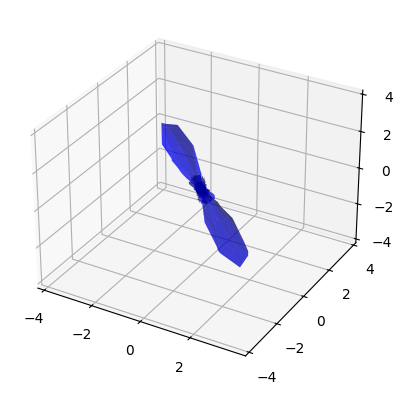

In [ ]:
for i in range(23,28):
    fig, ax = odf3.visualize_odf(ODFs[25,i,50], 64, 64)

## number_of_winkel = 1000


In [ ]:
k_ = 50
AODFs_raw = np.empty((50,50,100,91))
band = 10
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 1000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
        costheta, sintheta = np.cos(theta), np.sin(theta)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Richtungsvektoren generieren
        basis = get_basis(phi, costheta, sintheta, band)
        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = test(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]
        

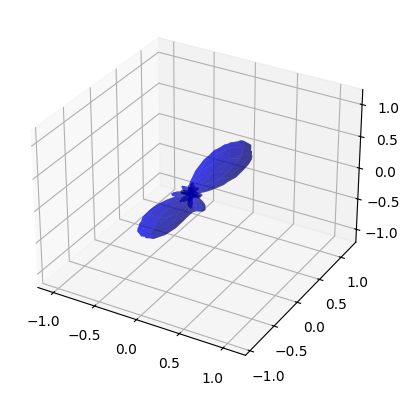

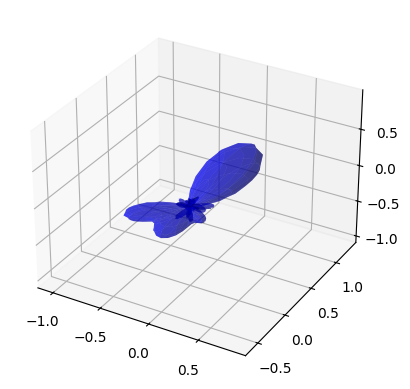

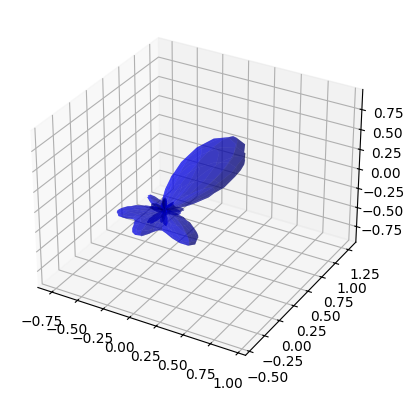

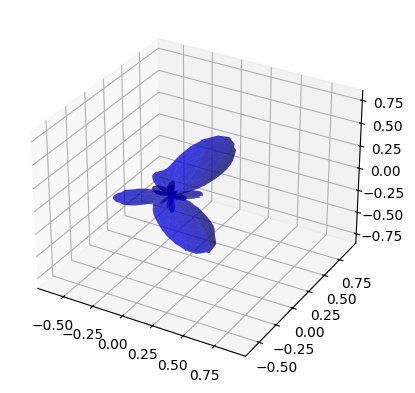

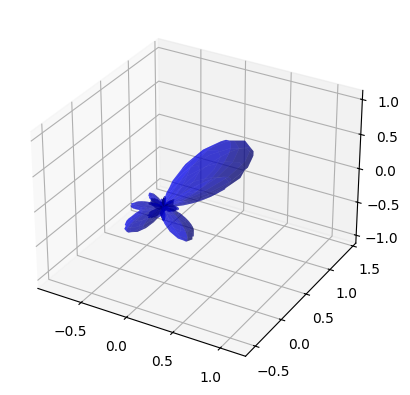

In [ ]:
for i in range(23,28):
    fig, ax = odf.visualize_odf(AODFs_raw[25,i,50], 64, 64)


# Probleme 
   1. Es dauert zu lange das Programm auszuführen
      -  Mit Cache für Basis generierung kann dies beschleunigt werden.
      -  Identischer Cache wie bei den Punkten im Kegel nur mit der Basis für den jeweiligen winkel

In [ ]:
def generate_dict(range_r = 10, factor = 10):
    Kugelschale, alpha, beta = get_points(factor)
    temp_dict = {tuple(a_row): b_row for a_row, b_row in zip(Kugelschale, koords_in_kegel_cache(range_r, alpha, beta))}
    return temp_dict


def get_basis(phi:np.ndarray, costheta:np.ndarray, sintheta:np.ndarray, band:int)->np.ndarray:
    basis = np.empty((phi.shape[0], odf3.get_num_coeff(band)))
    for i, (p, ct, st) in enumerate(zip(phi, costheta, sintheta)):
        basis[i, :] = odf3._analytic_single_odf(ct, st, p, band)
    return basis

In [9]:
from main_lib import *
def get_basis_xyz(x:int, y:int, z:int, band:int=10):
    phi = np.arccos(z/np.sqrt(x**2+y**2+z**2))
    theta = np.arctan2(y,x)
    costheta = np.cos(theta)
    sintheta = np.sin(theta)
    basis = np.empty((phi.shape[0], odf3.get_num_coeff(band)))
    for i, (p, ct, st) in enumerate(zip(phi, costheta, sintheta)):
        basis[i, :] = odf3._analytic_single_odf(ct, st, p, band)
    return basis

def generate_dict_basis(range_r:int = 10, factor:int = 10, band: int = 10):
    Kugelschale, alpha, beta = get_points(factor)
    temp_dict = {tuple(a_row): b_row for a_row, b_row in zip(Kugelschale, koords_in_kegel_cache(range_r, alpha, beta))}
    temp_dict_basis = {tuple(a_row): b_row for a_row, b_row in zip(Kugelschale, get_basis_xyz(*Kugelschale.T, band))}
    return temp_dict, temp_dict_basis

In [11]:
factor = 100
range_r = 4
bands = 5
dict_4_10, dict_basis = generate_dict_basis(range_r, factor, bands)
dict_basis

{(-14,
  -100,
  -2): array([ 0.28209481, -0.02121561, -0.14998704, -0.29720303,  0.00297077,
        -0.53535283,  0.04763922,  0.23796155,  0.01590091,  0.26318449,
         0.25771865, -0.00521285,  0.40124205, -0.0141546 ,  0.60011792]),
 (-14,
  -100,
  -1): array([ 0.28209481, -0.01061093, -0.1500091 , -0.29720303,  0.0014856 ,
        -0.53566796,  0.02384065,  0.23827696,  0.00795279,  0.2632232 ,
         0.25771865, -0.00260681,  0.40147823, -0.00708112,  0.60153359]),
 (-14,
  -100,
  0): array([ 2.82094806e-01,  6.56132764e-17, -1.50016457e-01, -2.97203034e-01,
        -9.18585890e-18, -5.35773039e-01, -1.47448901e-16,  2.38382146e-01,
        -4.91765459e-17,  2.63236105e-01,  2.57718652e-01,  1.61185638e-17,
         4.01556969e-01,  4.37900913e-17,  6.02005839e-01]),
 (-14,
  -100,
  1): array([ 0.28209481,  0.01061093, -0.1500091 , -0.29720303, -0.0014856 ,
        -0.53566796, -0.02384065,  0.23827696, -0.00795279,  0.2632232 ,
         0.25771865,  0.00260681,  0.4014

In [27]:
def kegel_from_dict_withBasis(dict_cache:dict, dict_cache_basis:dict, factor:int=10, x_koord:int=0, y_koord:int=0, z_koord:int=0, alpha:np.ndarray=np.array([]), beta:np.ndarray=np.array([]), get_phi_theta = False):
    # Winkelfunktionen vordefinieren
    cos_alpha = np.cos(alpha)
    sin_alpha = np.sin(alpha)
    cos_beta = np.cos(beta)
    sin_beta = np.sin(beta)
    # Karthesische Koordinate der symetrieachse berehnen
    x = (cos_beta)
    y = (sin_alpha*sin_beta)
    z = (-cos_alpha*sin_beta)
    koords = np.concatenate((x,y,z), axis=1)
    koords_rounded_int = np.array(np.round(koords*factor, 0), dtype=int)
    # Daten aus dem Dict herausholen
    arrays = [dict_cache[tuple(key)] for key in koords_rounded_int]
    result = np.array(arrays)
    arrays_basis = [dict_cache_basis[tuple(key)] for key in koords_rounded_int]
    res_basis = np.array(arrays_basis)
    # else:  # langsamer
    #     result = np.array(Parallel(n_jobs=-1)(delayed(get_array)(dict_cache,key) for key in koords_rounded_int))

    result[:,0,:] += x_koord
    result[:,1,:] += y_koord
    result[:,2,:] += z_koord
    if get_phi_theta == True:
        # Phi und Theta berechnen für ODFs
        phi = np.arccos(z)
        theta = np.arctan2(y,x)
        return (result, res_basis, phi, theta)

    return result, res_basis

In [37]:
def get_amplitude(result:np.ndarray, ODFs:np.ndarray, basis:np.ndarray, weights:np.ndarray)->np.ndarray:
    AODF_Amplitude = np.empty((result.shape[0]))
    for i, res in enumerate(result):
        # mask für nan werte
        nan_mask = ~np.isnan(res)
        mask = np.array(res[nan_mask], int)
        # shape anpassen
        mask_3d = np.reshape(mask, (3, int(mask.shape[0]/3)))
        # nur weights auswählen die nicht nan inhalte haben
        weight = weights[i, nan_mask[0]]
        Test_ODF_masked = np.multiply(weight, ODFs[mask_3d[0],mask_3d[1],mask_3d[2]-5].T).T
        current = np.multiply(basis[i], Test_ODF_masked)
        sum = np.sum(current)
        # if sum != 0.0:
        # print(sum,result.shape[0],res[0,~np.isnan(res[0])].shape[0])
        AODF_Amplitude[i] = sum/res[0,~np.isnan(res[0])].shape[0]
    return AODF_Amplitude

In [16]:
x_koord, y_koord, z_koord = 0,0,0
number_of_winkel = 1000

rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

result, res_basis = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta)


In [18]:
res_basis.shape

(1000, 15)

In [38]:
## Daten Generieren Y-Shape
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], band)
ODFs.shape

(100, 100, 100, 15)

In [39]:
import odf
import odf3

k_ = 50
AODFs_raw = np.empty((50,50,100,91))
band = 10
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 1000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]
        

## Das langsamste ist die get_amplitude Funktion

In [77]:
def get_amplitude(result:np.ndarray, ODFs:np.ndarray, basis:np.ndarray, weights:np.ndarray)->np.ndarray:
    AODF_Amplitude = np.empty((result.shape[0]))
    for i, res in enumerate(result):
        # mask für nan werte
        nan_mask = ~np.isnan(res)
        mask = np.array(res[nan_mask], int)
        # shape anpassen
        mask_3d = np.reshape(mask, (3, int(mask.shape[0]/3)))
        # nur weights auswählen die nicht nan inhalte haben
        weight = weights[i, nan_mask[0]]
        Test_ODF_masked = np.dot(weight[None,:], ODFs[mask_3d[0],mask_3d[1],mask_3d[2]-5])
        sum = np.dot(basis[None,i], Test_ODF_masked.T)
        AODF_Amplitude[i] = sum.item()/res[0,~np.isnan(res[0])].shape[0]
    return AODF_Amplitude

In [76]:
k_ = 50
AODFs_raw = np.empty((50,50,100,91))
band = 10
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 1000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]
        

## Immerhin etwas schneller

In [17]:
from main_lib import *

# Cache erstellen
factor = 100
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis(range_r, factor, bands)

# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

# band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
ODFs.shape

(100, 100, 100, 66)

In [18]:
k_ = 50
AODFs_raw = np.empty((50,50,100,231))
number_of_winkel = 10000
# band = 10
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
        AODFs_raw[i_,j_,k_,:] = AODF_d[0,0,0,:]
        

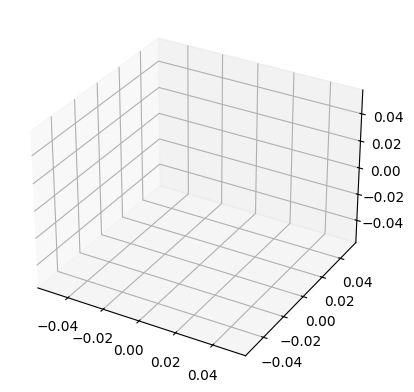

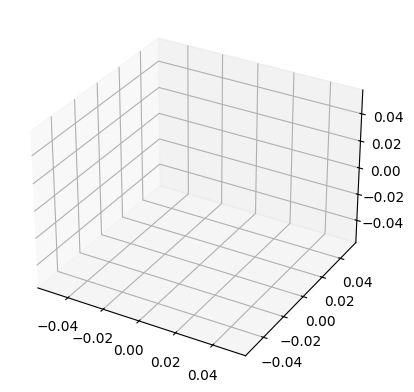

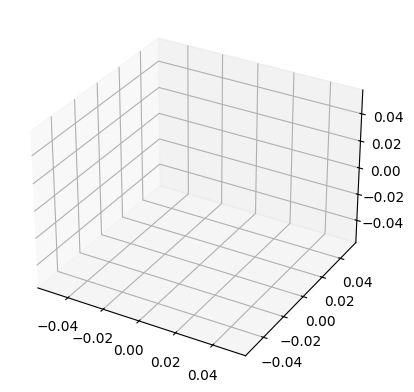

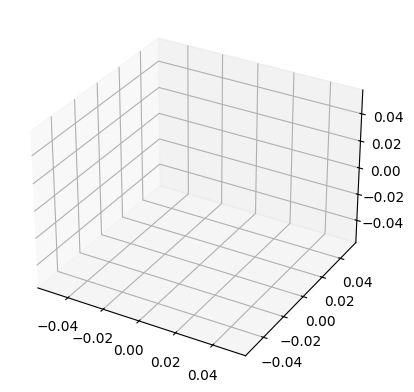

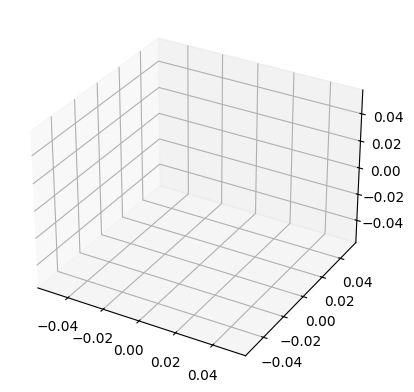

In [19]:
for i in range(23,28):
    fig, ax = odf.visualize_odf(AODFs_raw[25,i,50], 64, 64)


AODFs sehen nicht richtig aus D:

# Was ist Falsch?

In [1]:
from main_lib import *

# Cache erstellen
factor = 100
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis(range_r, factor, bands)

# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

# band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
ODFs.shape

(100, 100, 100, 66)

In [21]:
# band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
ODFs_copy = np.copy(ODFs)


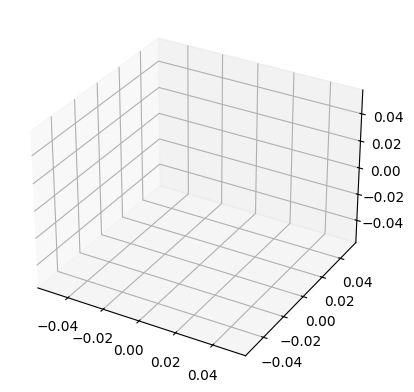

In [22]:
k_ = 50
AODFs_raw = np.empty((50,50,100,231))
number_of_winkel = 1000

x_koord, y_koord, z_koord = 25,25,50
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
# Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
AODF_mask = AODF_Amplitude > 0.1
AODF_Dir = phi[AODF_mask,:]
AODF_Incl = theta[AODF_mask,:] + np.pi/2
AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
AODFs_raw[25,25,50,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODFs_raw[25,25,50], 64, 64)

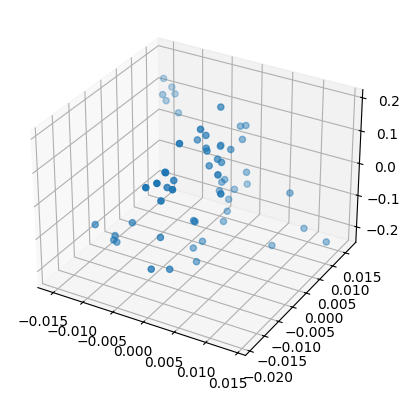

In [13]:
x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
z = AODF_Amplitude[:,None] * np.cos(theta)
x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])
plt.show()

''

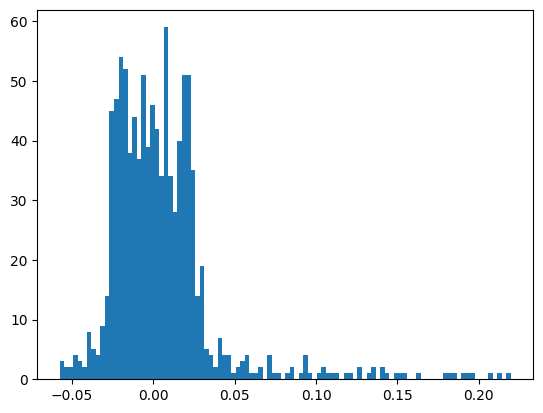

In [14]:
plt.hist(AODF_Amplitude, bins = 100)
,

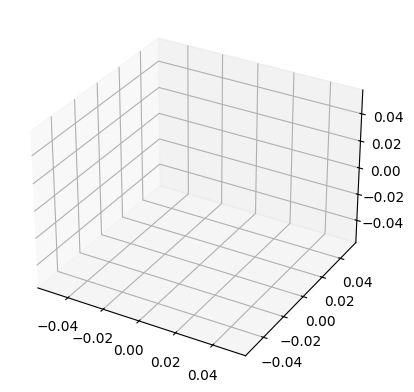

In [19]:
AODF_mask = AODF_Amplitude > 0.05
AODF_Dir = phi[AODF_mask,:]
AODF_Incl = theta[AODF_mask,:]+ np.pi/2
AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
AODFs_raw[25,25,50,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODFs_raw[25,25,50], 64, 64)

In [1]:
from main_lib import *

# Cache erstellen
factor = 100
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis_new(range_r, factor, bands)


In [2]:

# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

# band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
ODFs.shape


(100, 100, 100, 66)

In [3]:
number_of_winkel = 1000
k_ = 50
x_koord, y_koord, z_koord = 27,27,50
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

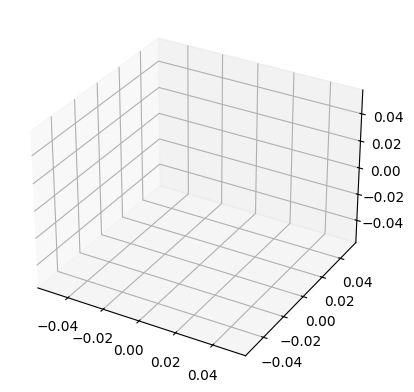

In [12]:
AODFs_raw = np.empty((50,50,100,231))


result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
# Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
AODF_mask = AODF_Amplitude > 0.05
AODF_Dir = phi[AODF_mask,:]
AODF_Incl = theta[AODF_mask,:]# + np.pi/2
AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]

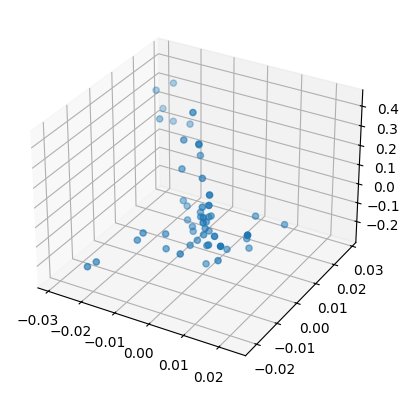

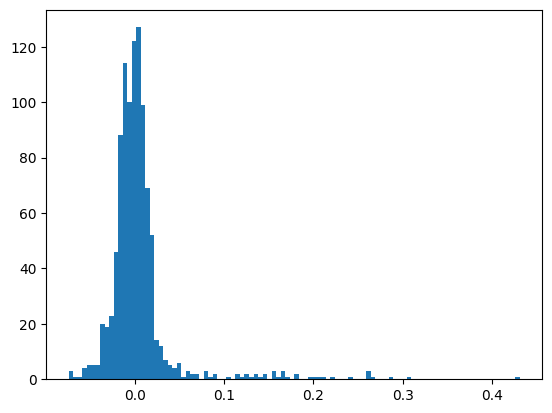

In [5]:
x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
z = AODF_Amplitude[:,None] * np.cos(theta)
x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()
plt.hist(AODF_Amplitude, bins = 100)
plt.show()

AODF_mask = AODF_Amplitude > 0.0

In [6]:
AODF_Amplitude.shape, np.sum(np.isnan(AODF_Amplitude))

((1000,), 0)

In [1]:
from main_lib import *

# Cache erstellen
factor = 50
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis_new(range_r, factor, bands)

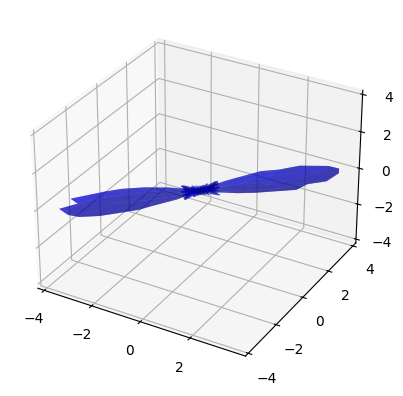

In [2]:
bands = 10
AODF_Dir = np.ones((30,30,30))*np.pi*5/4
AODF_Incl = np.ones((30,30,30))*np.pi
phi, theta = AODF_Dir, AODF_Incl
#odf3.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
ODFs = odf3.compute(AODF_Dir[:,:,:,None],AODF_Incl[:,:,:,None], np.ones((30,30,30))[:,:,:,None], bands)
fig, ax = odf3.visualize_odf(ODFs[0,0,0,:], 64, 64)

In [3]:
number_of_winkel = 10000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

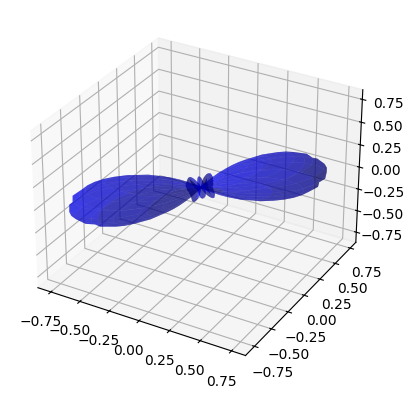

In [4]:
# AODFs_raw = np.empty((50,50,100,231))
x_koord, y_koord, z_koord = 15,15,15

result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
# Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
AODF_mask = AODF_Amplitude > 0.05
AODF_Dir = phi[AODF_mask,:]
AODF_Incl = theta[AODF_mask,:]# + np.pi/2
bands = 5
AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]

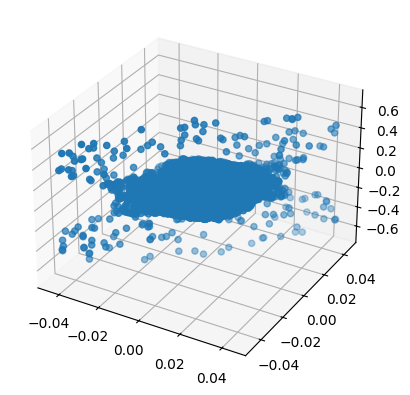

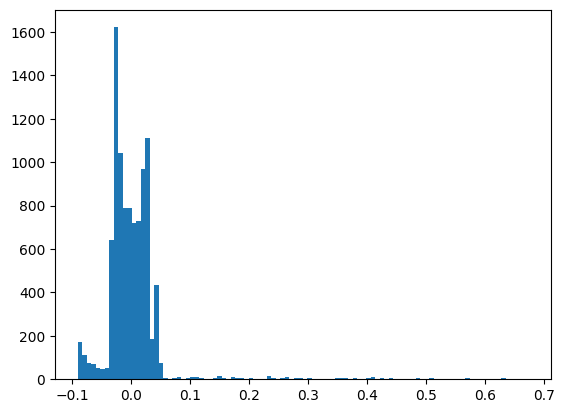

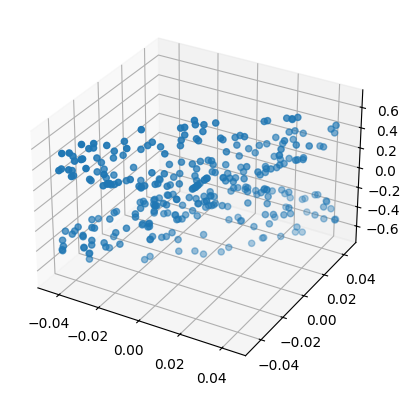

0

In [5]:
x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
z = AODF_Amplitude[:,None] * np.cos(theta)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()
plt.hist(AODF_Amplitude, bins = 100)
plt.show()

AODF_mask = AODF_Amplitude > 0.05

x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()

np.sum(np.isnan(AODF_Amplitude))

In [1]:
from main_lib import *

# Cache erstellen
factor = 50
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis_new(range_r, factor, bands)



In [2]:
bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

# band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
ODFs.shape

(100, 100, 100, 66)

In [3]:
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

(24, 1)


d:\dokumente\Python Skripts\Bachelor\BA\odf.py:250: RuntimeWarning: overflow encountered in multiply
  np.multiply(
d:\dokumente\Python Skripts\Bachelor\BA\odf.py:258: RuntimeWarning: invalid value encountered in multiply
  x = radius * np.sin(theta) * np.cos(phi)
d:\dokumente\Python Skripts\Bachelor\BA\odf.py:259: RuntimeWarning: invalid value encountered in multiply
  y = radius * np.sin(theta) * np.sin(phi)


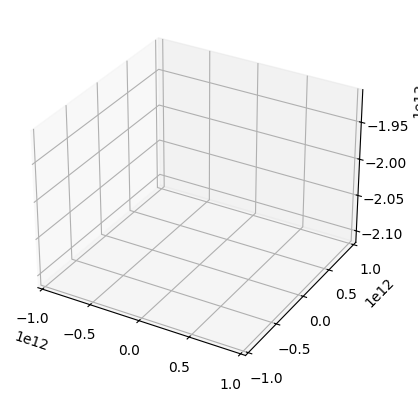

In [4]:
# AODFs_raw = np.empty((50,50,100,231))
x_koord, y_koord, z_koord = 23,25,25

result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
# Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
AODF_mask = AODF_Amplitude > 0.05
AODF_Dir = phi[AODF_mask,:]
AODF_Incl = np.pi/2 - theta[AODF_mask,:]
print(AODF_Dir.shape)
bands = 3
AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]

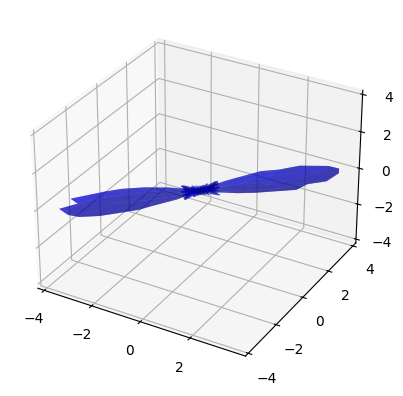

In [5]:
fig, ax = odf3.visualize_odf(ODFs[25,26,25,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]

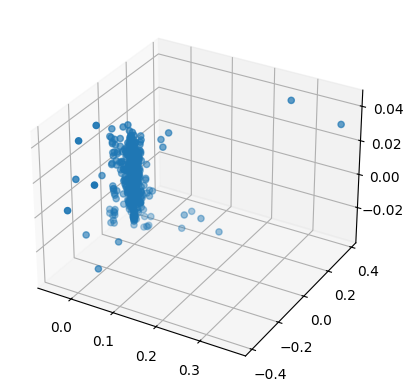

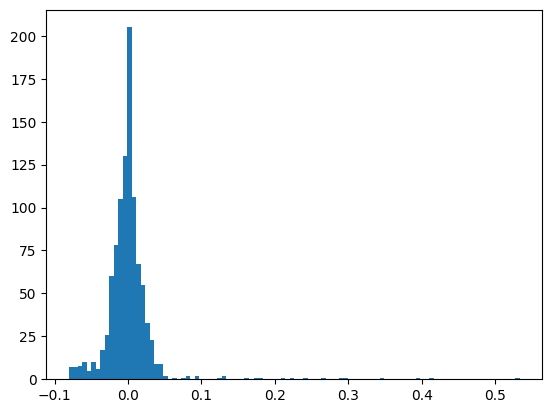

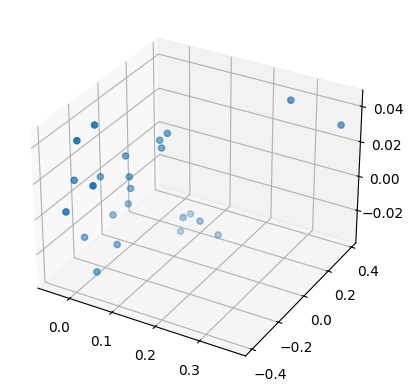

(0, (24, 1))

In [6]:
x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
z = AODF_Amplitude[:,None] * np.cos(theta)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()
plt.hist(AODF_Amplitude, bins = 100)
plt.show()

AODF_mask = AODF_Amplitude > 0.05

x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()

np.sum(np.isnan(AODF_Amplitude)), np.shape(x)

Nur 43 von 1000 Punkte geben die Form des Odfs vor... <br>
Die Punkte mit größerem Radius öfter an die compute funktion geben?

In [7]:
num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
num_greater

1014.0

(10059,)

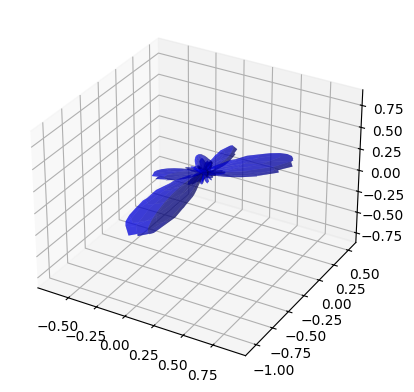

In [8]:
factor_amp = 1000
num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
multiple_dir = np.empty((num_greater,1))*np.nan
multiple_inc = np.empty((num_greater,1))*np.nan

count = 0
for i,j in enumerate(AODF_Amplitude):
    for k in range(int(j*factor_amp if j > 0 else 0)):
        multiple_dir[count,:] = phi[int(i)]#+ np.pi
        multiple_inc[count,:] = np.pi/2 - theta[int(i)] 
        count += 1
nan_mask = ~np.isnan(multiple_inc)
bands = 8
AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
multiple_dir[nan_mask].shape

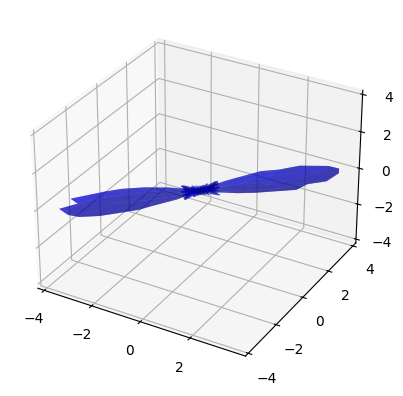

In [21]:
fig, ax = odf3.visualize_odf(ODFs[25,26,25,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]

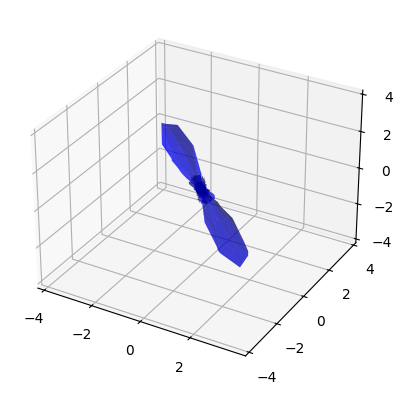

In [22]:
fig, ax = odf3.visualize_odf(ODFs[26,27,25,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]

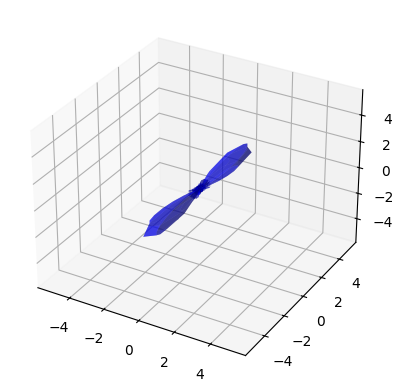

In [23]:
fig, ax = odf3.visualize_odf(ODFs[25,23,25,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]

## Next

In [ ]:
from main_lib import *

# Cache erstellen
factor = 50
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis_new(range_r, factor, bands)


(44, 1)


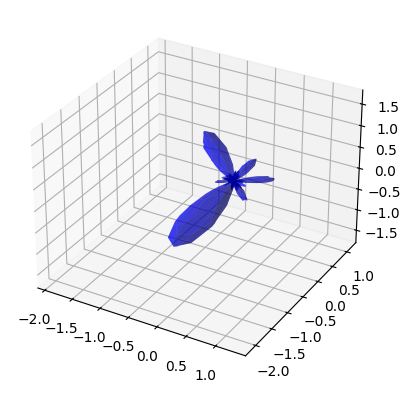

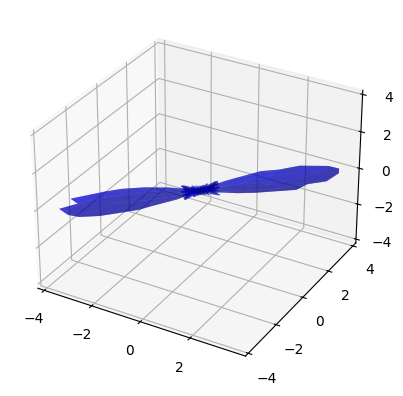

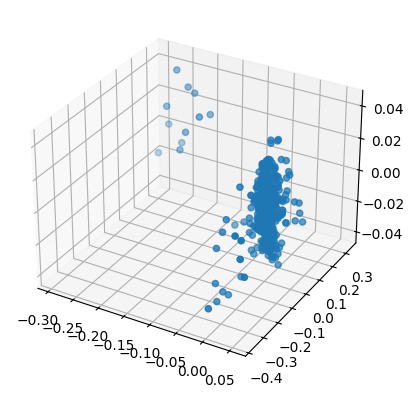

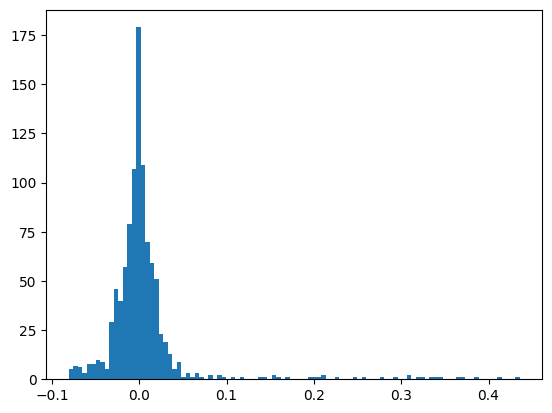

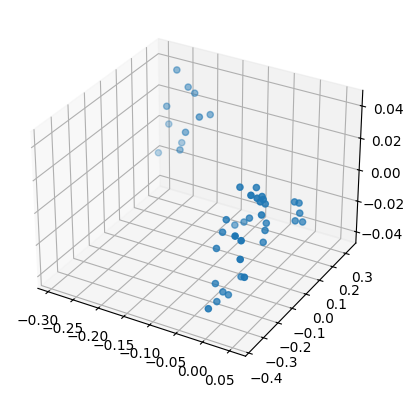

(13719,)

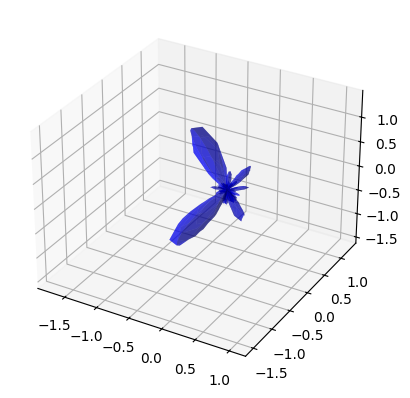

In [15]:
x_koord, y_koord, z_koord = 27,25,25

bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

# band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
ODFs.shape
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
# AODFs_raw = np.empty((50,50,100,231))


result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
# Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
AODF_mask = AODF_Amplitude > 0.05
AODF_Dir = phi[AODF_mask,:]
AODF_Incl = np.pi/2 - theta[AODF_mask,:]
print(AODF_Dir.shape)
bands = 10
AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
fig, ax = odf3.visualize_odf(ODFs[25,26,25,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
z = AODF_Amplitude[:,None] * np.cos(theta)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()
plt.hist(AODF_Amplitude, bins = 100)
plt.show()

AODF_mask = AODF_Amplitude > 0.05

x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()

np.sum(np.isnan(AODF_Amplitude)), np.shape(x)
num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
num_greater
factor_amp = 1000
num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
multiple_dir = np.empty((num_greater,1))*np.nan
multiple_inc = np.empty((num_greater,1))*np.nan

count = 0
for i,j in enumerate(AODF_Amplitude):
    for k in range(int(j*factor_amp if j > 0 else 0)):
        multiple_dir[count,:] = phi[int(i)]#+ np.pi
        multiple_inc[count,:] = np.pi/2 - theta[int(i)] 
        count += 1
nan_mask = ~np.isnan(multiple_inc)
bands = 10
AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
multiple_dir[nan_mask].shape

(49, 1)


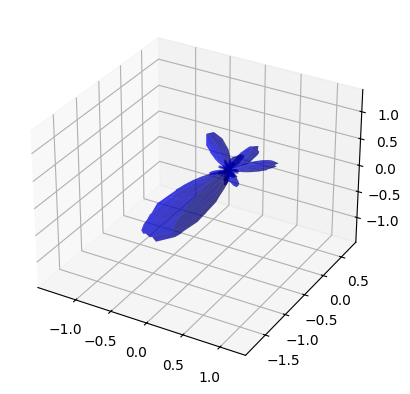

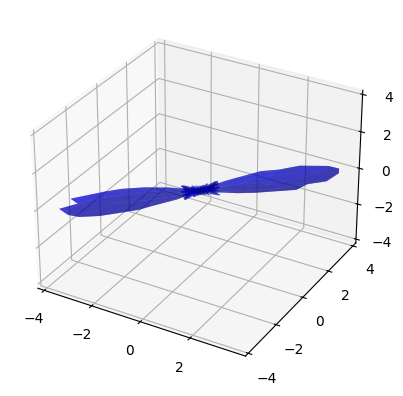

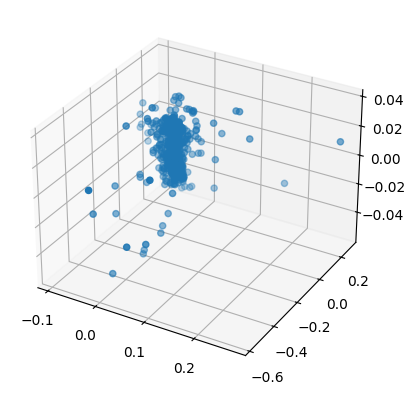

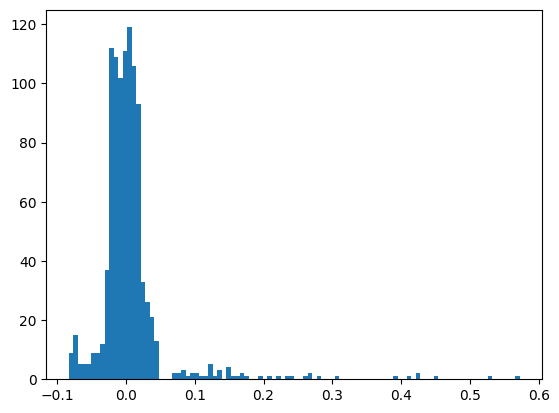

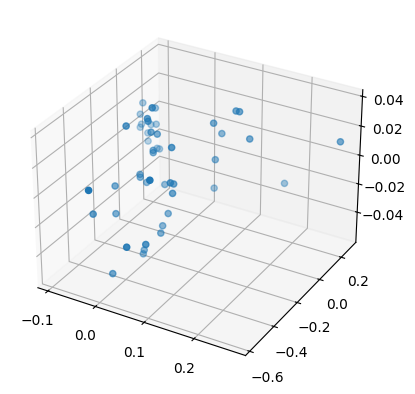

(15823,)

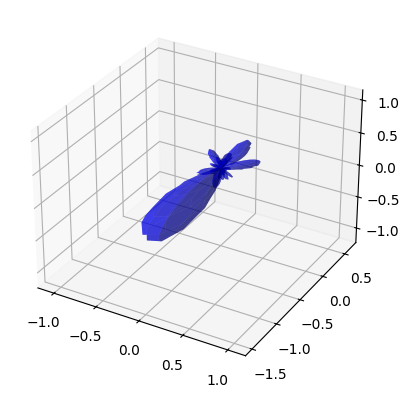

In [20]:
x_koord, y_koord, z_koord = 25,25,25

bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

# band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
ODFs.shape
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
# AODFs_raw = np.empty((50,50,100,231))


result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
# Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
AODF_mask = AODF_Amplitude > 0.05
AODF_Dir = phi[AODF_mask,:]
AODF_Incl = np.pi/2 - theta[AODF_mask,:]
print(AODF_Dir.shape)
bands = 8
AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
fig, ax = odf3.visualize_odf(ODFs[25,26,25,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
z = AODF_Amplitude[:,None] * np.cos(theta)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()
plt.hist(AODF_Amplitude, bins = 100)
plt.show()

AODF_mask = AODF_Amplitude > 0.05

x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()

np.sum(np.isnan(AODF_Amplitude)), np.shape(x)
num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
num_greater
factor_amp = 1000
num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
multiple_dir = np.empty((num_greater,1))*np.nan
multiple_inc = np.empty((num_greater,1))*np.nan

count = 0
for i,j in enumerate(AODF_Amplitude):
    for k in range(int(j*factor_amp if j > 0 else 0)):
        multiple_dir[count,:] = phi[int(i)]#+ np.pi
        multiple_inc[count,:] = np.pi/2 - theta[int(i)] 
        count += 1
nan_mask = ~np.isnan(multiple_inc)
bands = 8
AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
multiple_dir[nan_mask].shape

radien zu groß oder zu klein
radius array angucken
paar mehr simulierte daten
reellen daten

(36, 1)


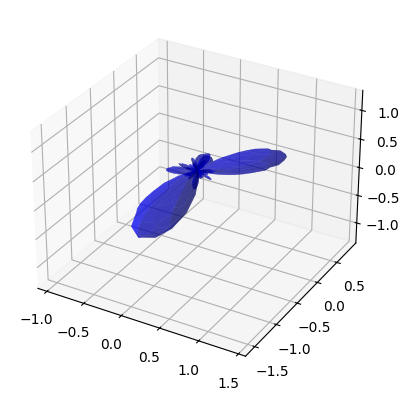

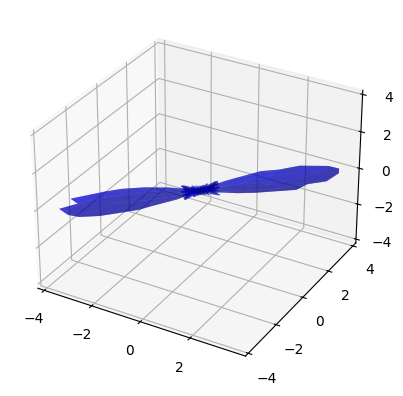

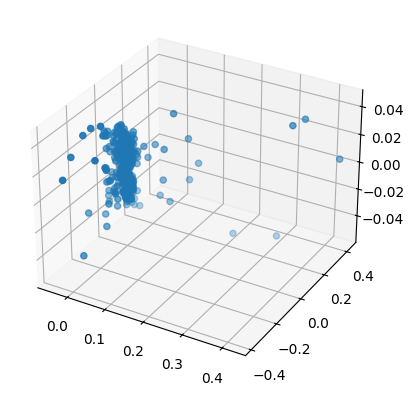

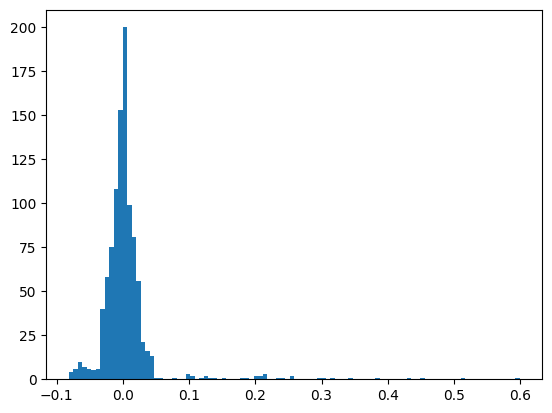

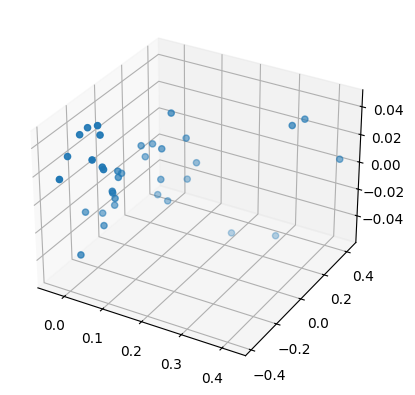

(13619,)

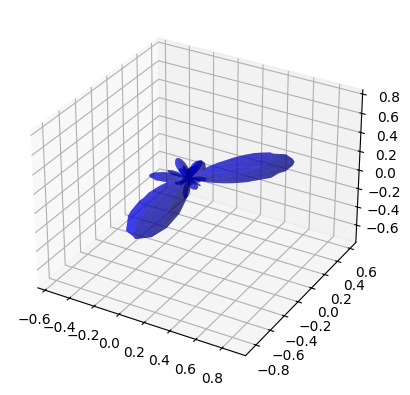

In [19]:
x_koord, y_koord, z_koord = 23,25,25

bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
Direction_zero = np.zeros((100,100,100))
Inclination_zero = np.copy(Direction_zero)
mask = np.ones((100,100,100))
for i in range(Direction_zero.shape[0]):
    for j in range(Direction_zero.shape[1]):
        for k in range(Direction_zero.shape[2]):
            if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                Direction_zero[i,j,k] = np.pi*(1/2)
            elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1+1/4)
            elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                Direction_zero[i,j,k] = np.pi*(1-1/4)
            else:
                mask[i,j,k] = 0

# band = 5
ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
ODFs.shape
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2
# AODFs_raw = np.empty((50,50,100,231))


result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)
# Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
AODF_mask = AODF_Amplitude > 0.05
AODF_Dir = phi[AODF_mask,:]
AODF_Incl = np.pi/2 - theta[AODF_mask,:]
print(AODF_Dir.shape)
bands = 7
AODF_d = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
fig, ax = odf3.visualize_odf(ODFs[25,26,25,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
z = AODF_Amplitude[:,None] * np.cos(theta)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()
plt.hist(AODF_Amplitude, bins = 100)
plt.show()

AODF_mask = AODF_Amplitude > 0.05

x = x[AODF_mask]
y = y[AODF_mask]
z = z[AODF_mask]
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])

plt.show()

np.sum(np.isnan(AODF_Amplitude)), np.shape(x)
num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
num_greater
factor_amp = 1000
num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
multiple_dir = np.empty((num_greater,1))*np.nan
multiple_inc = np.empty((num_greater,1))*np.nan

count = 0
for i,j in enumerate(AODF_Amplitude):
    for k in range(int(j*factor_amp if j > 0 else 0)):
        multiple_dir[count,:] = phi[int(i)]#+ np.pi
        multiple_inc[count,:] = np.pi/2 - theta[int(i)] 
        count += 1
nan_mask = ~np.isnan(multiple_inc)

AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
multiple_dir[nan_mask].shape

In [ ]:
for i_ in range(23,28):
    for j_ in range(23,28):
        x_koord, y_koord, z_koord = i_,j_,k_
        number_of_winkel = 1000

        rng = np.random.default_rng(random.randint(100000,10000000000))
        beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
        alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

        result, phi, theta = kegel_from_dict(dict_10_50, factor, x_koord, y_koord, z_koord, alpha, beta, get_phi_theta=True)
        costheta, sintheta = np.cos(theta), np.sin(theta)
        result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
        weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

        # Richtungsvektoren generieren
        basis = get_basis(phi, costheta, sintheta, band)
        # Mit weights alle punkte im Kegel ablaufen
        AODF_Amplitude = test(result, ODFs, basis, weights)
        # Die Richtungen mit größerem Beitrag in die ODF Berechnung nehmen
        AODF_mask = AODF_Amplitude > 0.025
        AODF_Dir = phi[AODF_mask,:]
        AODF_Incl = theta[AODF_mask,:] + np.pi/2
        AODF = odf.compute(np.ravel(AODF_Dir)[None,None,None,:],np.ravel(AODF_Incl)[None,None,None,:], np.ones(np.ravel(AODF_Dir)[None,None,None,:].shape))
        AODFs_raw[i_,j_,k_,:] = AODF[0,0,0,:]

        factor_amp = 1000
        num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
        multiple_dir = np.empty((num_greater,1))*np.nan
        multiple_inc = np.empty((num_greater,1))*np.nan

        count = 0
        for i,j in enumerate(AODF_Amplitude):
            for k in range(int(j*factor_amp if j > 0 else 0)):
                multiple_dir[count,:] = phi[int(i)]
                multiple_inc[count,:] = theta[int(i)]
                count += 1
        nan_mask = ~np.isnan(multiple_inc)
        bands = 7
        AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
        # AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]

# Kreuzung

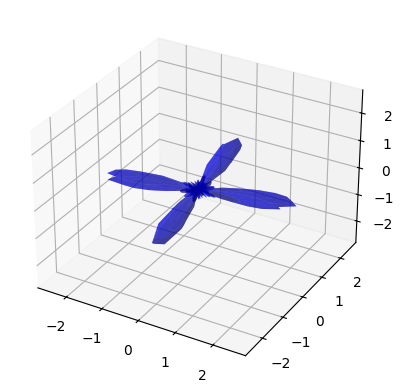

In [12]:
direction = np.random.uniform(-10, 10, (20, 20, 9))
inclination = np.random.uniform(-10, 10, (20, 20, 9))

direction = np.stack([direction, direction+90], axis=-1)
inclination = np.stack([inclination, inclination], axis=-1)

band = 10
ODFs = odf3.compute(np.deg2rad(direction), np.deg2rad(inclination), bands=band)
fig, ax = odf3.visualize_odf(ODFs[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]

In [13]:
np.save("Crossing_npsave", ODFs)

In [74]:
odf3.coefficients_to_mrtrix_nii(f"1Test_{bands}band", ODFs[:,:,:,:])

# Funktion die alles zusammenfasst

In [2]:
def get_Y_Odfs(bands:int=10):
    Direction_zero = np.zeros((100,100,100))
    Inclination_zero = np.copy(Direction_zero)
    mask = np.ones((100,100,100))
    for i in range(Direction_zero.shape[0]):
        for j in range(Direction_zero.shape[1]):
            for k in range(Direction_zero.shape[2]):
                if j <= 25 and i <= 27 and i >= 23 and k <= 50:
                    Direction_zero[i,j,k] = np.pi*(1/2)
                elif i <= 50 and j <= 50 and k <= 50 and j <= -i+52 and j >= -i+48 and j > 25:
                    Direction_zero[i,j,k] = np.pi*(1+1/4)
                elif i <= 50 and j <= 50 and k <= 50 and j <= i+2 and j >= i-2 and j > 25:
                    Direction_zero[i,j,k] = np.pi*(1-1/4)
                else:
                    mask[i,j,k] = 0
    _ODFs = odf3.compute(Direction_zero[:,:,:,None], Inclination_zero[:,:,:,None], mask[:,:,:,None], bands)
    return _ODFs

In [1]:
from main_lib import *

# Cache erstellen
factor = 50
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis_new(range_r, factor, bands)

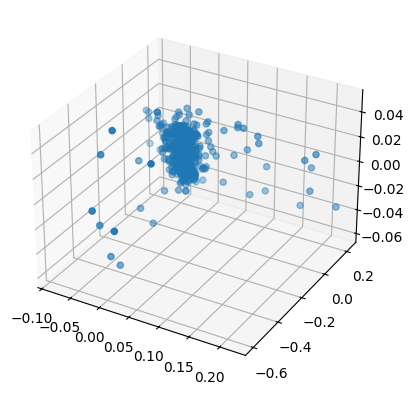

(16108,)

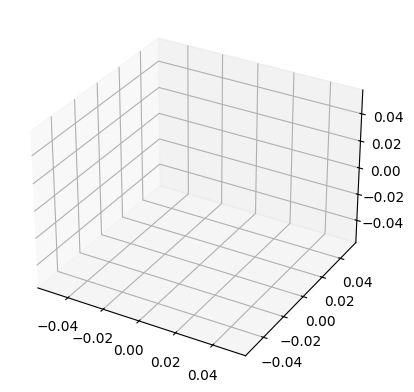

In [2]:
# Punkt Festlegen 
x_koord, y_koord, z_koord = 25,25,25

bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
ODFs = get_Y_Odfs(bands)

# Winkel generieren
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

# Punkte im Kegel mit Basisvektoren und Winkeln generieren
result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)

# Scatterplot generieren
x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
z = AODF_Amplitude[:,None] * np.cos(theta)
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
n = 10000
ax.scatter(x[:n],y[:n],z[:n])
plt.show()


num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
factor_amp = 1000
num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
multiple_dir = np.empty((num_greater,1))*np.nan
multiple_inc = np.empty((num_greater,1))*np.nan

count = 0
for i,j in enumerate(AODF_Amplitude):
    for k in range(int(j*factor_amp if j > 0 else 0)):
        multiple_dir[count,:] = phi[int(i)]
        multiple_inc[count,:] = np.pi/2 - theta[int(i)] 
        count += 1

nan_mask = ~np.isnan(multiple_inc)
bands = 8
AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
# AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
multiple_dir[nan_mask].shape

In [ ]:
def visualize_odf(coefficients, n_phi, n_theta, scale=1, fig=None, ax=None):
    phi, theta = np.mgrid[0 : 2 * np.pi : n_phi * 1j, 0 : np.pi : n_theta * 1j]

    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    radius = np.empty_like(phi)
    bands = _get_bands_from_coeff(coefficients.size)

    for i, (p, ct, st) in enumerate(
        zip(phi.ravel(), cos_theta.ravel(), sin_theta.ravel())
    ):
        radius.ravel()[i] = (
            np.sum(
                np.multiply(
                    _analytic_single_odf(ct, st, p, bands),
                    coefficients,
                )
            )
            * scale
        )

    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)

    flag = False
    if fig is None:
        fig = plt.figure()
    if ax is None:
        ax = fig.add_subplot(111, projection="3d")
        flag = True
        ax.plot_surface(x, y, z, color="b", alpha=0.5)
    else:
        for count, angle in enumerate([[0,0,0],[0,90,0],[90,0,0]]):
            ax[count].plot_surface(x, y, z, color="b", alpha=0.5)
            ax[count].view_init(elev=angle[0], azim=angle[1], roll=angle[2])

            x_limits = ax[count].get_xlim3d()
            y_limits = ax[count].get_ylim3d()
            z_limits = ax[count].get_zlim3d()

            x_range = abs(x_limits[1] - x_limits[0])
            x_middle = np.mean(x_limits)
            y_range = abs(y_limits[1] - y_limits[0])
            y_middle = np.mean(y_limits)
            z_range = abs(z_limits[1] - z_limits[0])
            z_middle = np.mean(z_limits)

            # The plot bounding box is a sphere in the sense of the infinity
            # norm, hence I call half the max range the plot radius.
            plot_radius = 0.5 * max([x_range, y_range, z_range])

            ax[count].set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
            ax[count].set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
            ax[count].set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    if flag:
        _set_axes_equal(ax)

    return fig, ax

ValueError: num must be an integer with 1 <= num <= 2, not 0

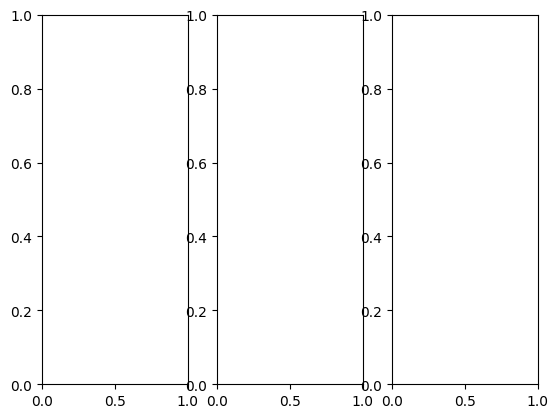

In [3]:
AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
fig, ax = plt.subplots(1,3)
for count, angle in enumerate([[0,0,0],[0,90,0],[90,0,0]]):
    fig, ax[count] = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64,fig=fig)
    ax[count].view_init(elev=angle[0], azim=angle[1], roll=angle[2])

In [8]:
AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)

for count, angle in enumerate([[0,0,0],[0,90,0],[90,0,0]]):
    fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64,fig=fig)
    ax.view_init(elev=angle[0], azim=angle[1], roll=angle[2])


In [10]:
fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64,fig=fig)


# Größere Umgebung AODF generieren

In [ ]:
# Punkt Festlegen 

x_koord, y_koord, z_koord = 25,25,25

bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
ODFs = get_Y_Odfs(bands)


##########
# Winkel generieren
number_of_winkel = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

# Punkte im Kegel mit Basisvektoren und Winkeln generieren
result, basis, phi, theta = kegel_from_dict_withBasis(dict_4_10, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)

## Scatterplot generieren
# x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
# y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
# z = AODF_Amplitude[:,None] * np.cos(theta)
# fig = plt.figure()
# ax = fig.add_subplot(projection = "3d")
# n = 10000
# ax.scatter(x[:n],y[:n],z[:n])
# plt.show()


num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
factor_amp = 1000
num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
multiple_dir = np.empty((num_greater,1))*np.nan
multiple_inc = np.empty((num_greater,1))*np.nan

count = 0
for i,j in enumerate(AODF_Amplitude):
    for k in range(int(j*factor_amp if j > 0 else 0)):
        multiple_dir[count,:] = phi[int(i)]
        multiple_inc[count,:] = np.pi/2 - theta[int(i)] 
        count += 1

nan_mask = ~np.isnan(multiple_inc)
bands = 8
AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
# # AODFs_raw[x_koord, y_koord, z_koord,:] = AODF_d[0,0,0,:]
# fig, ax = odf.visualize_odf(AODF_d[0,0,0,:], 64, 64) # AODFs_raw[x_koord, y_koord, z_koord]
# multiple_dir[nan_mask].shape

In [4]:
def Get_AODF(ODFs:np.ndarray, dict_res:dict, dict_basis:dict, factor:int, x_koord:int, y_koord:int, z_koord:int, bands:int=10, number_of_winkel:int = 1000, factor_amp:int = 1000):
    # Winkel generieren
    rng = np.random.default_rng(random.randint(100000,10000000000))
    beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
    alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

    # Punkte im Kegel mit Basisvektoren und Winkeln generieren
    result, basis, phi, theta = kegel_from_dict_withBasis(dict_res, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
    result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
    weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

    # Mit weights alle punkte im Kegel ablaufen
    AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)

    ## Scatterplot generieren
    # x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
    # y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
    # z = AODF_Amplitude[:,None] * np.cos(theta)
    # fig = plt.figure()
    # ax = fig.add_subplot(projection = "3d")
    # n = 10000
    # ax.scatter(x[:n],y[:n],z[:n])
    # plt.show()


    num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
    
    num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
    multiple_dir = np.empty((num_greater,1))*np.nan
    multiple_inc = np.empty((num_greater,1))*np.nan

    count = 0
    for _i,_j in enumerate(AODF_Amplitude):
        for k in range(int(_j*factor_amp if _j > 0 else 0)):
            multiple_dir[count,:] = phi[int(_i)]
            multiple_inc[count,:] = np.pi/2 - theta[int(_i)] 
            count += 1

    nan_mask = ~np.isnan(multiple_inc)
    Test_mask = multiple_inc == 0
    if str(Test_mask[nan_mask].shape) == "(0,)":
        return np.empty((1,1,1,odf.get_num_coeff(bands)))
    AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
    return AODF_d

In [1]:
from main_lib import *

# Cache erstellen
factor = 50
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis_new(range_r, factor, bands)
x_koord, y_koord, z_koord = 25,25,25

bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
ODFs = get_Y_Odfs(bands)

In [2]:
ODFs = get_Y_Odfs(bands)

In [2]:
odf.get_num_coeff(bands), ODFs.shape, (bands+1)**2

(121, (100, 100, 100, 66), 121)

In [3]:
AODFs = np.empty((15,15,15,odf.get_num_coeff(bands)))
for i in range(15,30):
    for j in range(15,30):
        for k in range(15,30):
            AODF_single = Get_AODF(ODFs,dict_4_10, dict_basis,factor,i,j,k)
            AODFs[i-15,j-15,k-15,:] = AODF_single[0,0,0,:]

In [6]:
AODFs.shape

(15, 15, 15, 231)

In [24]:
odf3.coefficients_to_mrtrix_nii(f"AODFs_Ycrossing_{bands}band", AODFs)

In [25]:
odf3.coefficients_to_mrtrix_nii(f"ODFs_Ycrossing_{bands}band", ODFs[15:30,15:30,15:30,:])

In [4]:
np.save(f"AODF_npsave_{odf.get_num_coeff(bands)}", AODFs)

In [2]:
np.save("ODF_npsave", ODFs[15:30,15:30,15:30,:])

# Beschleunigen?

## Erstellung der Liste von Winkeln

In [28]:
dict_res = dict_4_10
factor_amp = 1000
rng = np.random.default_rng(random.randint(100000,10000000000))
beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

# Punkte im Kegel mit Basisvektoren und Winkeln generieren
result, basis, phi, theta = kegel_from_dict_withBasis(dict_res, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

# Mit weights alle punkte im Kegel ablaufen
AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)

## Scatterplot generieren
# x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
# y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
# z = AODF_Amplitude[:,None] * np.cos(theta)
# fig = plt.figure()
# ax = fig.add_subplot(projection = "3d")
# n = 10000
# ax.scatter(x[:n],y[:n],z[:n])
# plt.show()


num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))

num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))
multiple_dir = np.empty((num_greater,1))*np.nan
multiple_inc = np.empty((num_greater,1))*np.nan

count = 0
for _i,_j in enumerate(AODF_Amplitude):
    for k in range(int(_j*factor_amp if _j > 0 else 0)):
        multiple_dir[count,:] = phi[int(_i)]
        multiple_inc[count,:] = np.pi/2 - theta[int(_i)] 
        count += 1

In [40]:
nonzero_indices = np.where(AODF_Amplitude*factor_amp > 1)[0]
count = len(nonzero_indices)

multiple_dir_ = np.empty((1,count))*np.nan
multiple_inc_ = np.empty((1,count))*np.nan

multiple_dir_[:, :count] = np.tile(phi[nonzero_indices], (count, 1)).T
multiple_inc_[:, :count] = np.pi / 2 - np.tile(theta[nonzero_indices], (count, 1)).T

ValueError: could not broadcast input array from shape (1,217156) into shape (1,466)

In [49]:
repeated_phi = np.repeat(phi[nonzero_indices], np.round(AODF_Amplitude[nonzero_indices] * factor_amp).astype(int))

In [54]:
nan_mask = ~np.isnan(multiple_dir)
repeated_phi.shape, multiple_dir[nan_mask].shape

((14330,), (14100,))

In [56]:
repeated_phi,multiple_dir[nan_mask]

(array([0.52148371, 0.52148371, 0.52148371, ..., 1.39333383, 1.39333383,
        1.39333383]),
 array([0.52148371, 0.52148371, 0.52148371, ..., 1.39333383, 1.39333383,
        1.39333383]))

In [2]:
def Get_AODF(ODFs:np.ndarray, dict_res:dict, dict_basis:dict, factor:int, x_koord:int, y_koord:int, z_koord:int, bands:int=10, number_of_winkel:int = 1000, factor_amp:int = 1000):
    # Winkel generieren
    rng = np.random.default_rng(random.randint(100000,10000000000))
    beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
    alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

    # Punkte im Kegel mit Basisvektoren und Winkeln generieren
    result, basis, phi, theta = kegel_from_dict_withBasis(dict_res, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
    result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
    weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

    # Mit weights alle punkte im Kegel ablaufen
    AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)

    ## Scatterplot generieren
    # x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
    # y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
    # z = AODF_Amplitude[:,None] * np.cos(theta)
    # fig = plt.figure()
    # ax = fig.add_subplot(projection = "3d")
    # n = 10000
    # ax.scatter(x[:n],y[:n],z[:n])
    # plt.show()


    # num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
    
    # num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))

    greater_one = np.where(AODF_Amplitude*factor_amp > 1)[0]
    multiple_dir = np.repeat(phi[greater_one], np.round(AODF_Amplitude[greater_one] * factor_amp).astype(int))
    multiple_inc = np.pi/2 - np.repeat(theta[greater_one], np.round(AODF_Amplitude[greater_one] * factor_amp).astype(int))

    # count = 0
    # for _i,_j in enumerate(AODF_Amplitude):
    #     for k in range(int(_j*factor_amp if _j > 0 else 0)):
    #         multiple_dir[count,:] = phi[int(_i)]
    #         multiple_inc[count,:] = np.pi/2 - theta[int(_i)] 
    #         count += 1

    nan_mask = ~np.isnan(multiple_inc)
    Test_mask = multiple_inc == 0
    if str(Test_mask[nan_mask].shape) == "(0,)":
        return np.empty((1,1,1,odf.get_num_coeff(bands)))
    AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
    return AODF_d

In [58]:
AODFs = np.empty((15,15,15,odf.get_num_coeff(bands)))
for i in range(15,30):
    for j in range(15,30):
        for k in range(15,30):
            AODF_single = Get_AODF(ODFs,dict_4_10, dict_basis,factor,i,j,k)
            AODFs[i-15,j-15,k-15,:] = AODF_single[0,0,0,:]

C:\Users\tlock\AppData\Local\Temp\ipykernel_13548\2307100524.py:6: RuntimeWarning: invalid value encountered in cast
  AODFs[i-15,j-15,k-15,:] = AODF_single[0,0,0,:]


## AODF Berechnung auslagern

In [1]:
def Get_AODF(ODFs:np.ndarray, dict_res:dict, dict_basis:dict, factor:int, x_koord:int, y_koord:int, z_koord:int, bands:int=10, number_of_winkel:int = 1000, factor_amp:int = 1000):
    # Winkel generieren
    rng = np.random.default_rng(random.randint(100000,10000000000))
    beta = np.arccos(1-2*(rng.random(number_of_winkel).reshape(number_of_winkel,1)))
    alpha = rng.random(number_of_winkel).reshape(number_of_winkel,1)*math.pi*2

    # Punkte im Kegel mit Basisvektoren und Winkeln generieren
    result, basis, phi, theta = kegel_from_dict_withBasis(dict_res, dict_basis, factor, x_koord, y_koord, z_koord, alpha, beta, True)
    result_rot = reverse_rotate_and_translate_data(result, x_koord, y_koord, z_koord, alpha, beta)
    weights = gauss_2d(result_rot[:,1,:], result_rot[:,2,:], y_koord, z_koord, sigma = 2)

    # Mit weights alle punkte im Kegel ablaufen
    AODF_Amplitude = get_amplitude(result, ODFs, basis, weights)

    ## Scatterplot generieren
    # x = AODF_Amplitude[:,None] * np.cos(phi) * np.sin(theta)
    # y = AODF_Amplitude[:,None] * np.sin(phi) * np.sin(theta)
    # z = AODF_Amplitude[:,None] * np.cos(theta)
    # fig = plt.figure()
    # ax = fig.add_subplot(projection = "3d")
    # n = 10000
    # ax.scatter(x[:n],y[:n],z[:n])
    # plt.show()


    # num_greater = np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*100))
    
    # num_greater = int(np.sum(np.rint(AODF_Amplitude[AODF_Amplitude > 0]*factor_amp)))

    greater_one = np.where(AODF_Amplitude*factor_amp > 1)[0]
    multiple_dir = np.repeat(phi[greater_one], np.round(AODF_Amplitude[greater_one] * factor_amp).astype(int))
    multiple_inc = np.pi/2 - np.repeat(theta[greater_one], np.round(AODF_Amplitude[greater_one] * factor_amp).astype(int))

    # count = 0
    # for _i,_j in enumerate(AODF_Amplitude):
    #     for k in range(int(_j*factor_amp if _j > 0 else 0)):
    #         multiple_dir[count,:] = phi[int(_i)]
    #         multiple_inc[count,:] = np.pi/2 - theta[int(_i)] 
    #         count += 1

    nan_mask = ~np.isnan(multiple_inc)
    Test_mask = multiple_inc == 0
    if str(Test_mask[nan_mask].shape) == "(0,)":
        return np.empty((1,1,1,odf.get_num_coeff(bands)))
    AODF_d = odf.compute(np.ravel(multiple_dir[nan_mask])[None,None,None,:],np.ravel(multiple_inc[nan_mask])[None,None,None,:], np.ones(np.ravel(multiple_inc[nan_mask])[None,None,None,:].shape), bands)
    return AODF_d

    # return np.empty((1,1,1,odf.get_num_coeff(bands)))

NameError: name 'np' is not defined

In [74]:
AODFs = np.empty((15,15,15,odf.get_num_coeff(bands)))
for i in range(15,30):
    for j in range(15,30):
        for k in range(15,30):
            AODF_single = Get_AODF(ODFs,dict_4_10, dict_basis,factor,i,j,k)
            AODFs[i-15,j-15,k-15,:] = AODF_single

C:\Users\tlock\AppData\Local\Temp\ipykernel_13548\1098949986.py:6: RuntimeWarning: invalid value encountered in cast
  AODFs[i-15,j-15,k-15,:] = AODF_single


### Ca 10 sekunden Unterschied... nicht nennenswert bei 1 min 30 sek, da die Berechnung der AODFs danach auch noch zeit benötigt

In [6]:
fig, ax = odf.visualize_odf(AODFs[12,12,8,:], 64, 64) 

ValueError: operands could not be broadcast together with shapes (64,) (121,) 

KeyboardInterrupt: 

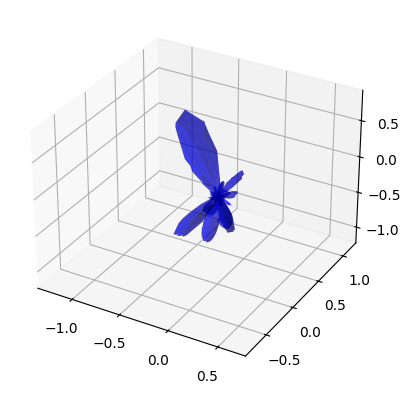

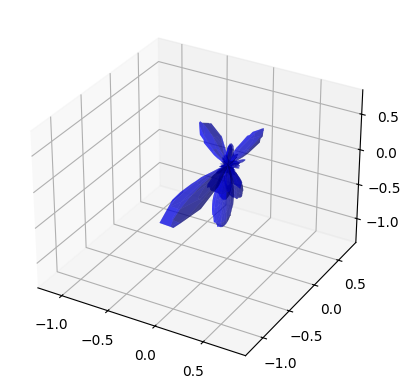

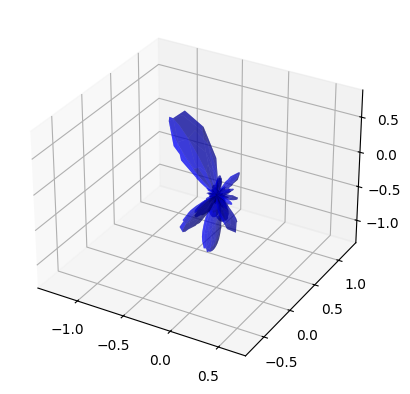

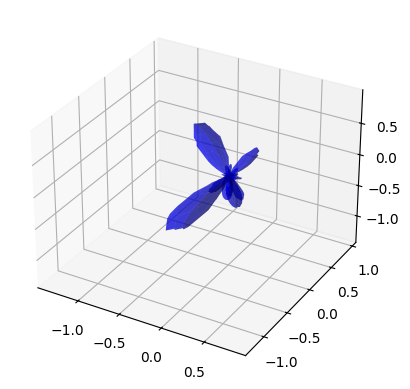

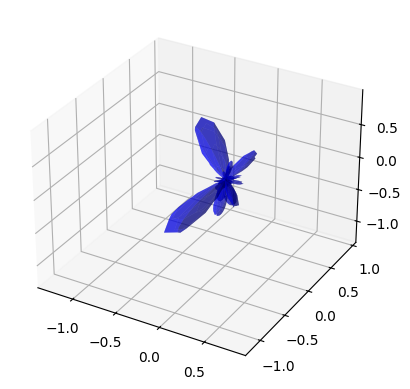

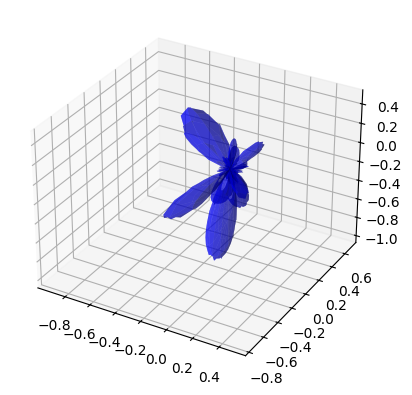

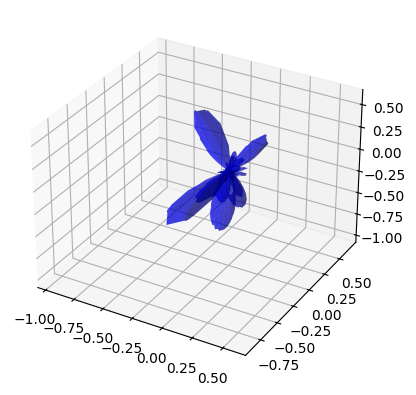

In [7]:
for i in range(15):
    fig, ax = odf.visualize_odf(AODFs[14,9,i,:], 64, 64) 

In [ ]:
from main_lib import *

# Cache erstellen
factor = 50
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis_new(range_r, factor, bands)
x_koord, y_koord, z_koord = 25,25,25

bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
ODFs = get_Y_Odfs(bands)

AODFs = np.empty((15,15,15,odf.get_num_coeff(bands)))
for i in range(15,30):
    for j in range(15,30):
        for k in range(15,30):
            AODF_single = Get_AODF(ODFs,dict_4_10, dict_basis,factor,i,j,k)
            AODFs[i-15,j-15,k-15,:] = AODF_single[0,0,0,:]

In [ ]:
np.save(f"AODF_npsave_{odf.get_num_coeff(bands)}", AODFs)
np.save("ODF_npsave", ODFs[15:30,15:30,15:30,:])

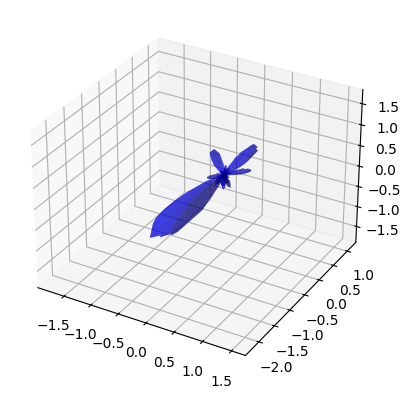

In [6]:
fig, ax = odf.visualize_odf(AODFs[12,9,8,:], 64, 64) 

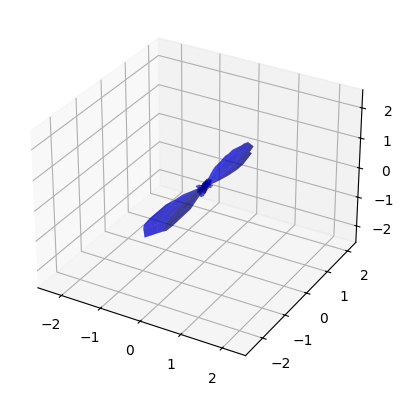

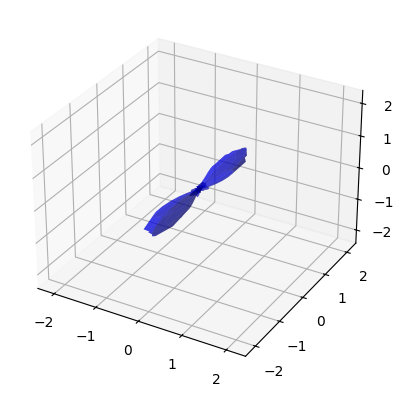

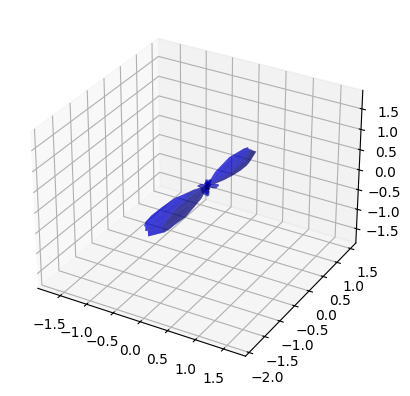

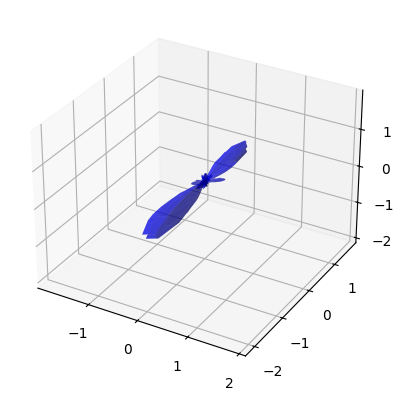

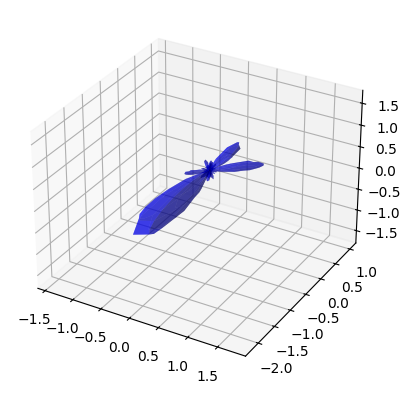

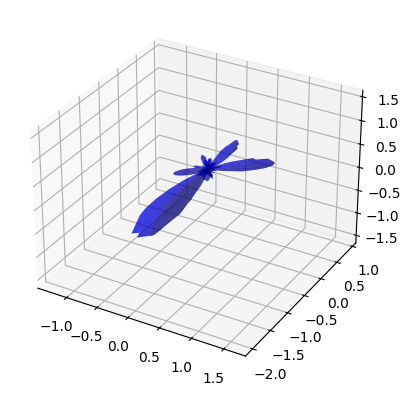

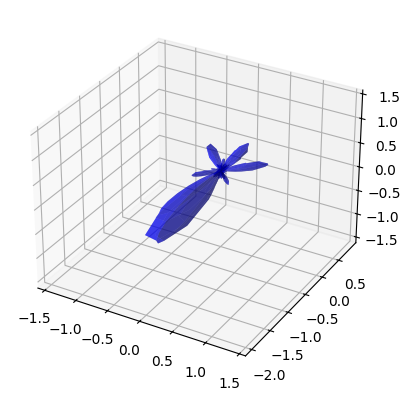

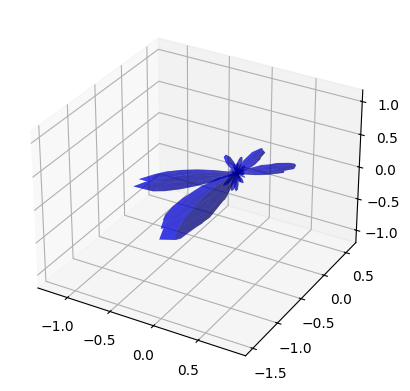

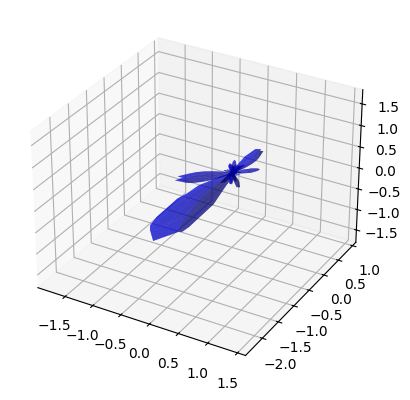

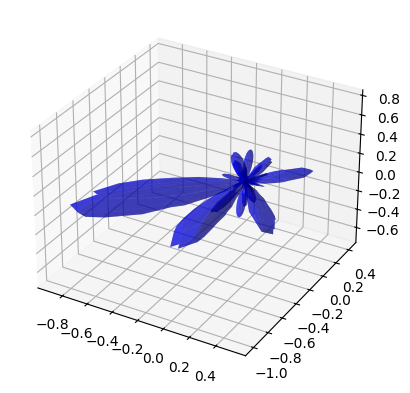

In [27]:
for i in range(5,15):
    fig, ax = odf.visualize_odf(AODFs[10,i,8,:], 64, 64) 

In [16]:
ODFs = get_Y_Odfs(bands)


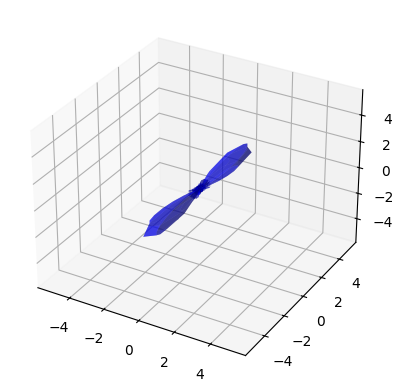

In [26]:
fig, ax = odf3.visualize_odf(ODFs[15+8,15+9,15+8,:], 64, 64)  

# Achtung !
An den Rändern der ODFs entstehen extreme ODFs, da diese nur wenige winkel an die AODF berechnung geben... das Führt zu extrem einseitigen ausschlägen

In [11]:
from main_lib import *

# Cache erstellen
factor = 50
range_r = 4
bands = 10
dict_4_10, dict_basis = generate_dict_basis_new(range_r, factor, bands)
x_koord, y_koord, z_koord = 25,25,25

bands = 10
# Anzahl der Winkel festlegen
number_of_winkel = 1000
# Daten einlesen/Generieren
## Daten Generieren Y-Shape
ODFs = get_Y_Odfs_noise(bands)

np.save("0Test_ODFs", ODFs)



In [12]:
ODFs.shape

(40, 40, 40, 66)

In [15]:
AODFs = np.empty((15,15,15,odf.get_num_coeff(bands)))
for i in range(15,30):
    for j in range(15,30):
        for k in range(15,30):
            AODF_single = Get_AODF(ODFs[:,:,None,:],dict_4_10, dict_basis,factor,i,j,k)
            AODFs[i-15,j-15,k-15,:] = AODF_single[0,0,0,:]

KeyboardInterrupt: 

In [2]:
ODFs[:,:,None,:].shape

NameError: name 'ODFs' is not defined

In [5]:
import numpy as np
AODF_Amplitude = np.arange(0,1,0.01)
phi = np.arange(0,100,1)
theta  = np.arange(0,100,1)
factor_amp = 10
greater_one = np.where(AODF_Amplitude*factor_amp > 1)[0]
multiple_dir = np.repeat(phi[greater_one], np.round(AODF_Amplitude[greater_one] * factor_amp).astype(int))
multiple_inc = np.pi/2 - np.repeat(theta[greater_one], np.round(AODF_Amplitude[greater_one] * factor_amp).astype(int))

In [10]:
multiple_dir.shape,multiple_inc.shape

((490,), (490,))

In [8]:
AODF_Amplitude[greater_one]*factor_amp

array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
       2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5,
       7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8,
       8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])